# Mechanistic Interpretability of RNNs emulating Hidden Markov Models

In [1]:
from scripts.manager import Manager
from scripts.metrics import compare_hmm_rnn_transition_matrices, compare_hmm_rnn_euclidean_distances
from scripts.statespace import run_pipeline
from scripts.plotting.subspace_residency import subspace_residency_plot, subspace_residency_plotv2
from scripts.mechint import load_weights, locate_areas, noise_sensitivity, residency_plot, neuron_activities, weight_matrices, mean_activities, pca_evolution, second_order, ablation

/home/elia/Documents/rnnrep/scripts/mechint.py:613: SyntaxWarning: invalid escape sequence '\g'
  title2 = f"Cluster ($\gamma=${gni})" if idj == idx_vals[0] else f"Transition ($\gamma=${gni})"
/home/elia/Documents/rnnrep/scripts/mechint.py:613: SyntaxWarning: invalid escape sequence '\g'
  title2 = f"Cluster ($\gamma=${gni})" if idj == idx_vals[0] else f"Transition ($\gamma=${gni})"
/home/elia/Documents/rnnrep/scripts/mechint.py:1213: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='$\mathbb{E}[dh^{(2)}]$')
/home/elia/Documents/rnnrep/scripts/mechint.py:1336: SyntaxWarning: invalid escape sequence '\m'
  axs[1, 0].set_xlabel("$\mu$")
/home/elia/Documents/rnnrep/scripts/mechint.py:1358: SyntaxWarning: invalid escape sequence '\m'
  axs[1, 1].set_xlabel("$\mu$")
/home/elia/Documents/rnnrep/scripts/mechint.py:1380: SyntaxWarning: invalid escape sequence '\m'
  axs[1, 2].set_xlabel("$\mu$")


## Training
Functions to train a single or multiple models with or without saving intermediate epochs

### Train a Single Model

Let's run a single model training with verbose output to see the training progress.

In [ ]:
manager = Manager(config_name="HMMThreeTriangularFully")
results = manager.run_experiment(verbose=True)

### Train Multiple Models

You can also run multiple experiments in sequence.

In [ ]:
multi_manager = Manager()
config_names = ["HMMTwo", "HMMThree", "HMMFour", "HMMFive"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=False)

### Train & Save Model per Epoch

Training the model with the option to save the model at every epoch

In [ ]:
manager = Manager(config_name="pisellino4")
results = manager.run_training_evo(verbose=True)
print(f"Best Loss: {results['best_loss']}")
print(f"Experiment Duration: {results['experiment_duration_minutes']} minutes")

## Performance Metrics
Functions to calculate and plot Euclidean distances and transition matrices across 144 models: M = {2,3,4,5} latent states, |h| = {50, 150, 200} hidden sizes, d = {1, 10, 100, 200} input dimensions and 3 random seeds.

In [ ]:
compare_hmm_rnn_euclidean_distances()

In [ ]:
compare_hmm_rnn_transition_matrices()

## Latent Space Projections in PCA and Variance Contour Plots
Function to calculate and plot trajectories with/without gaussian inputs in PCA space and contour plots with varying input noise standard deviation across 48 models: M = {2,3,4,5} latent states, |h| = {50, 150, 200} hidden sizes, d = {1, 10, 100, 200} input dimensions.

In [ ]:
run_pipeline()

## Exploration of Latent Dynamics

Latent dynamical properties for four RNNs trained on HMMs with: 2,3,4 and 5 latent states. The RNNs analyzed share hidden size |h| = 150 and input size d = 100. The models are contained in TrainedModels/{Two, Three, Four, Five}/{hidden_150}/{input_100}/{seed_0}

### State Space Across Epochs

In [ ]:
# 2 States
pca_evolution("TrainedModels/Two/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 10, 25, 100, 200], purple_epoch=50)

In [ ]:
# 3 States
pca_evolution("TrainedModels/Three/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 10, 25, 150, 300], purple_epoch=55)

In [ ]:
# 4 States
pca_evolution("TrainedModels/Four/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 10, 25, 150, 300], purple_epoch=100)

In [ ]:
# 5 States
pca_evolution("TrainedModels/Five/hidden_150/input_100/seed_0/models/evolution", selected_epochs_list=[1, 50, 150, 400, 500], purple_epoch=380)

In [ ]:
# Fully-Connected
pca_evolution("/home/elia/Documents/rnnrep/TrainedModels/Fully_Connected/Seed 2/models/evolution", selected_epochs_list=[1, 50, 80, 400, 500], purple_epoch=207)

In [ ]:
# Cyclic
pca_evolution("/home/elia/Documents/rnnrep/TrainedModels/Cyclic/Seed 1/models/evolution", selected_epochs_list=[1, 50, 80, 300, 500], purple_epoch=280)

### Expected Second Order & Transition Rate

In [ ]:
# 2 States
second_order("TrainedModels/Two/hidden_150/input_100/seed_0/models/evolution", max_epochs=250, ep_rate=10, threshold=0.05, bifep=None, silent=True)


In [ ]:
# 3 States
second_order("TrainedModels/Three/hidden_150/input_100/seed_0/models/evolution", max_epochs=250, ep_rate=10, threshold=0.05, bifep=None, silent=True)

In [ ]:
# 4 States
second_order("TrainedModels/Four/hidden_150/input_100/seed_0/models/evolution", max_epochs=250, ep_rate=10, threshold=0.03, bifep=None, silent=True)

In [ ]:
# 5 States
second_order("TrainedModels/Five/hidden_150/input_100/seed_0/models/evolution", max_epochs=500, ep_rate=10, threshold=0.02, bifep=None, silent=True)

In [11]:
# Fully-Connected
second_order("/home/elia/Documents/rnnrep/TrainedModels/Fully_Connected/Seed 2/models/evolution", max_epochs=500, ep_rate=10, threshold=0.02, bifep=None, silent=True)

/home/elia/Documents/rnnrep/scripts/mechint.py:348: RuntimeWarning: invalid value encountered in matmul
  h0 = relu((Wr @ h0)*ct + (Wn@u)*ctn)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Cyclic
second_order("/home/elia/Documents/rnnrep/TrainedModels/Cyclic/Seed 1/models/evolution", max_epochs=500, ep_rate=10, threshold=0.02, bifep=None, silent=True)

### Residency Times and Average Logit Gradient Sign Changes

In [ ]:
# 2 States|
residency_plot("Two States", "TrainedModels/Two/hidden_150/input_100/seed_0/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", sigma=1, max_steps=60, t0=20, T=5000, n_samples=20)

In [ ]:
# 3 States
residency_plot("Three States", "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

In [ ]:
# 4 States
residency_plot("Four States", "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

In [ ]:
# 5 States
residency_plot("Five States", "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

Computing metrics: 100%|██████████| 5000/5000 [01:53<00:00, 44.07it/s]


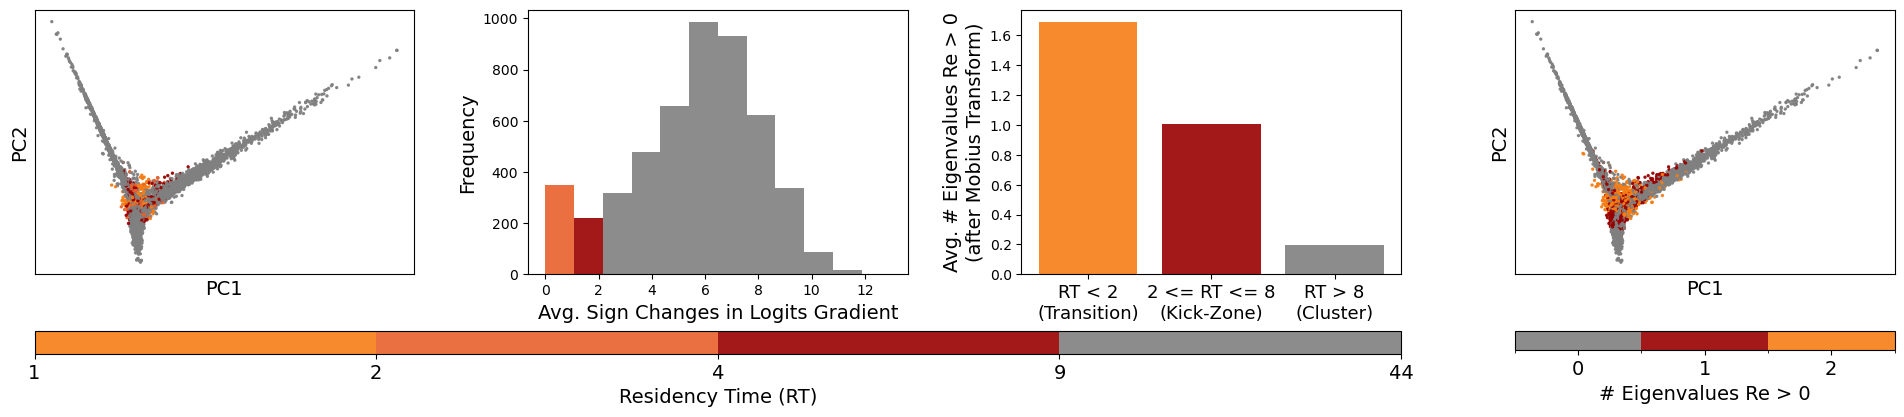

In [4]:
residency_plot("Fully Connected", "Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth", sigma=1, max_steps=60, t0=20, T=5000, n_samples=20)

/home/elia/Documents/rnnrep/scripts/mechint.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn.load_state_dict(torch.load(model_path))
Computing metrics:   1%|        

Computing metrics: 100%|██████████| 10000/10000 [04:51<00:00, 34.34it/s]


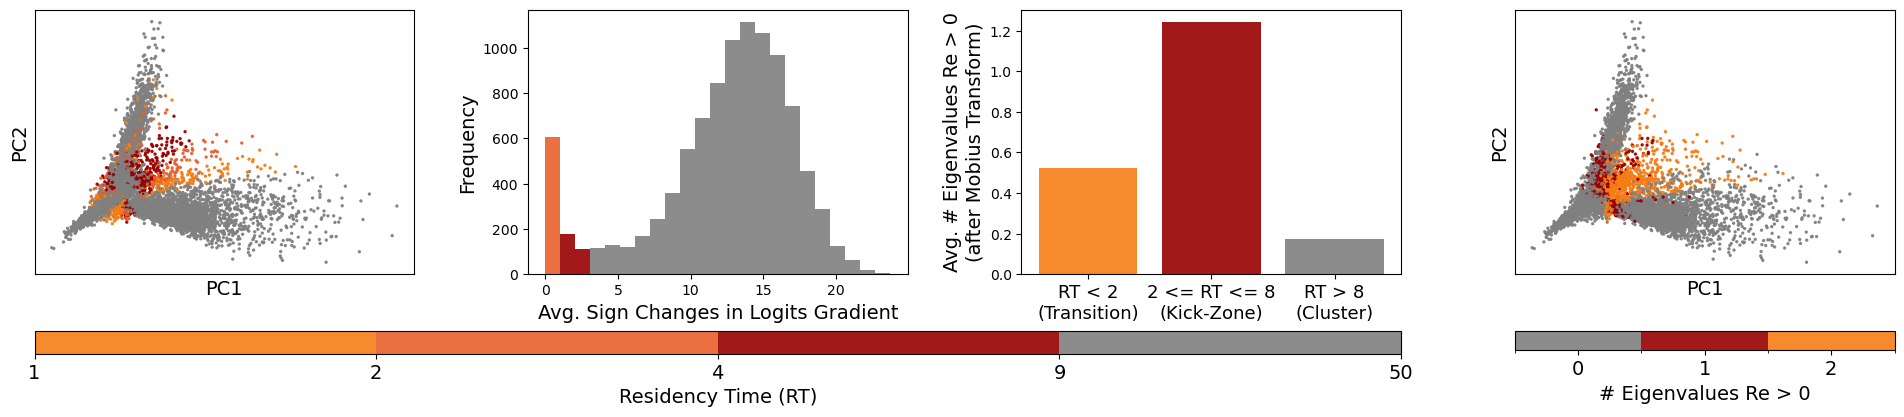

In [5]:
residency_plot("Fully Connected", "Experiments/20250729_171645/pisellino4/models/4HMM_3Outputs_linear_30kData_0.001lr_5.5Loss.pth", sigma=1, max_steps=60, t0=20, T=10000, n_samples=20)

/home/elia/Documents/rnnrep/scripts/mechint.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn.load_state_dict(torch.load(model_path))
Computing metrics: 100%|████████

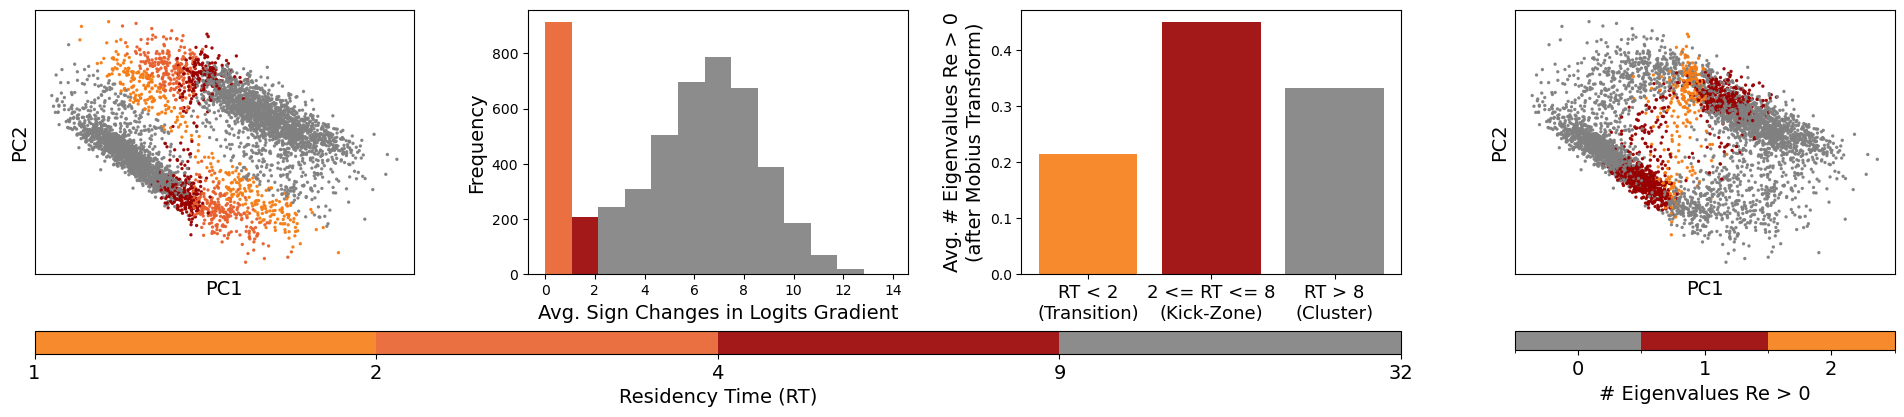

In [4]:
residency_plot("tr", "Experiments/20250725_153223/HMMReview4/models/2HMM_3Outputs_linear_30kData_0.001lr_7.9Loss.pth", sigma=1, max_steps=60, t0=20, T=5000, n_samples=20)

Starting subspace residency analysis
Loading model from: /home/elia/Documents/rnnrep/TrainedModels/Fully_Connected/Seed 0/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth
Generating 50000 timesteps...


/home/elia/Documents/rnnrep/scripts/plotting/subspace_residency.py:405: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn.load_state_dict(torch.load(model_path))


Generated 50000 hidden states
Output distribution: [20434 16385 13181]
Computing global PCA with 4 components...
Global PCA explained variance: [0.57297194 0.24235246 0.06249053 0.02692078]

Processing subspace for outputs [0, 1]
Filtered to 5417 states in 2-output subspace
Computing subspace PCA...
Subspace PCA explained variance: [0.7977574  0.16657233 0.03306105]
Computing residency metrics...


Computing metrics: 100%|██████████| 5417/5417 [02:20<00:00, 38.57it/s]


Creating plot...
Saved plot to: scripts/plotting/plots/residency_subspace/residency_subspace_01_PC1_PC3_20251008_182103.svg


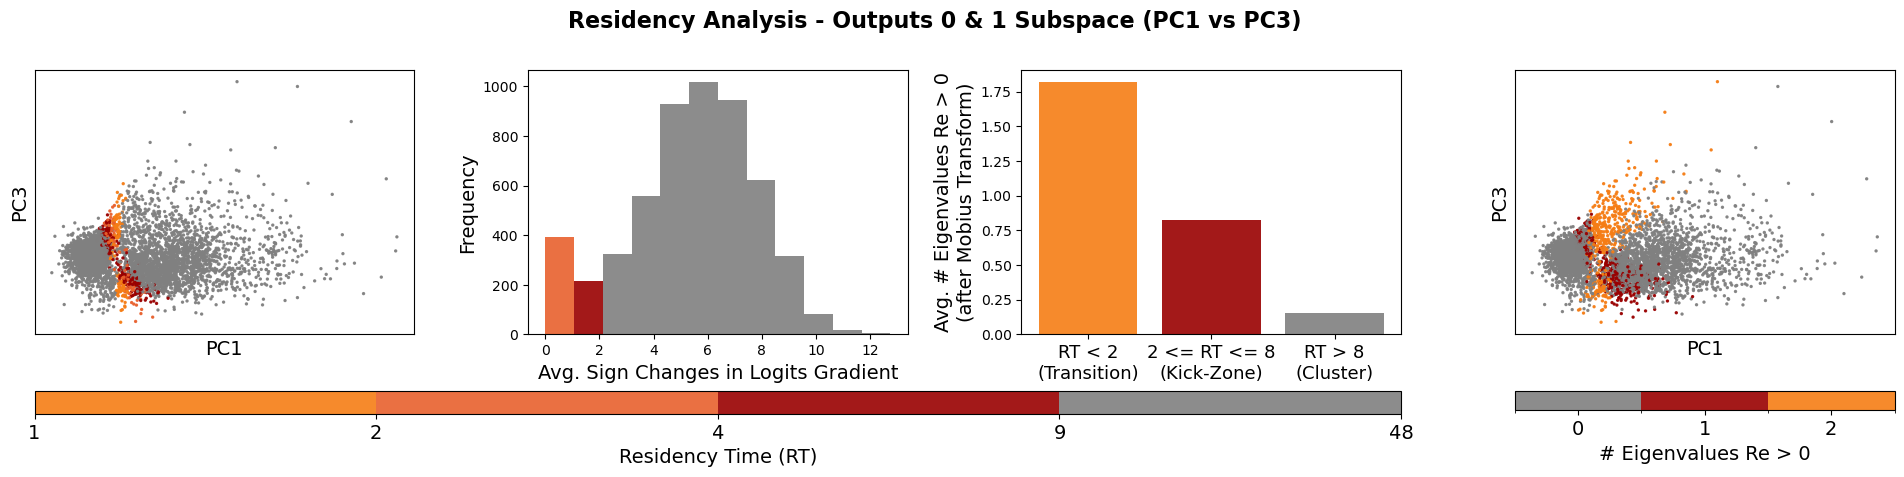


Processing subspace for outputs [1, 2]
Filtered to 466 states in 2-output subspace
Computing subspace PCA...
Subspace PCA explained variance: [0.87039083 0.08773925 0.03898206]
Computing residency metrics...


Computing metrics: 100%|██████████| 466/466 [00:11<00:00, 39.00it/s]


Creating plot...
Saved plot to: scripts/plotting/plots/residency_subspace/residency_subspace_12_PC1_PC3_20251008_182116.svg


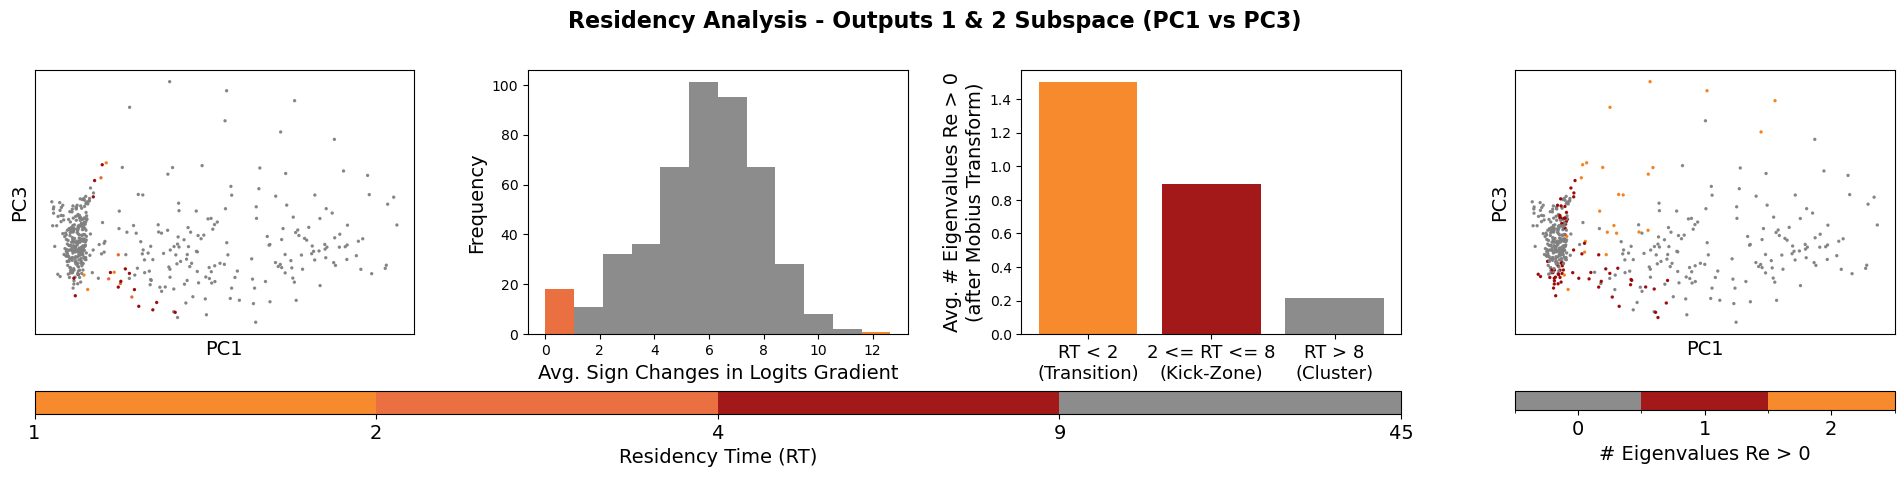


Processing subspace for outputs [0, 2]
Filtered to 3403 states in 2-output subspace
Computing subspace PCA...
Subspace PCA explained variance: [0.82897896 0.14476414 0.02509336]
Computing residency metrics...


Computing metrics: 100%|██████████| 3403/3403 [01:28<00:00, 38.27it/s]


Creating plot...
Saved plot to: scripts/plotting/plots/residency_subspace/residency_subspace_02_PC1_PC3_20251008_182245.svg


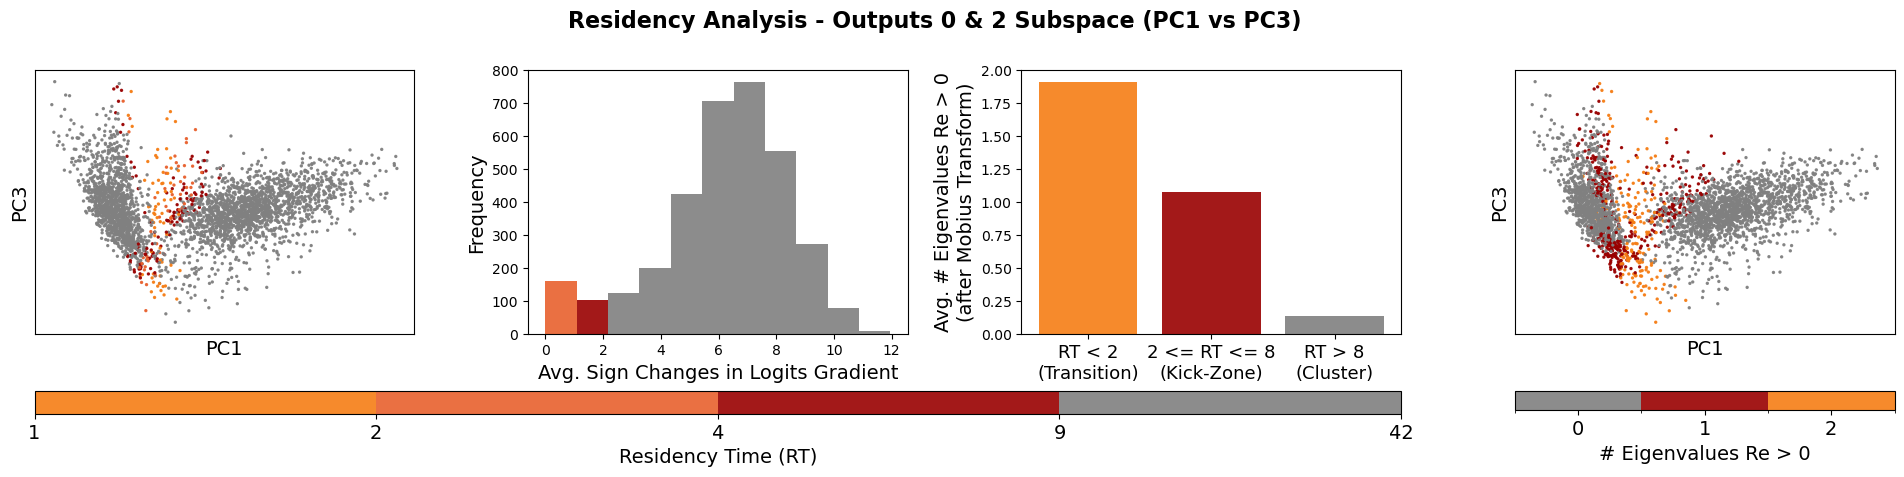


Subspace residency analysis completed!


In [3]:
subspace_residency_plotv2(model_path="/home/elia/Documents/rnnrep/TrainedModels/Fully_Connected/Seed 0/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth", output_combinations=[[0, 1], [1, 2], [0, 2]], sigma=1, max_steps=60, n_samples=20, t0=20, time_steps=50000, min_sequence_length=200, n_components_global=4, input_size=100, hidden_size=150, output_size=3)

### Noise Sensitivity

To obtain clear results, you might need to run a couple of attempts until you obtain correct initial conditions for clusters (left three plots) and transition (right three plots) .

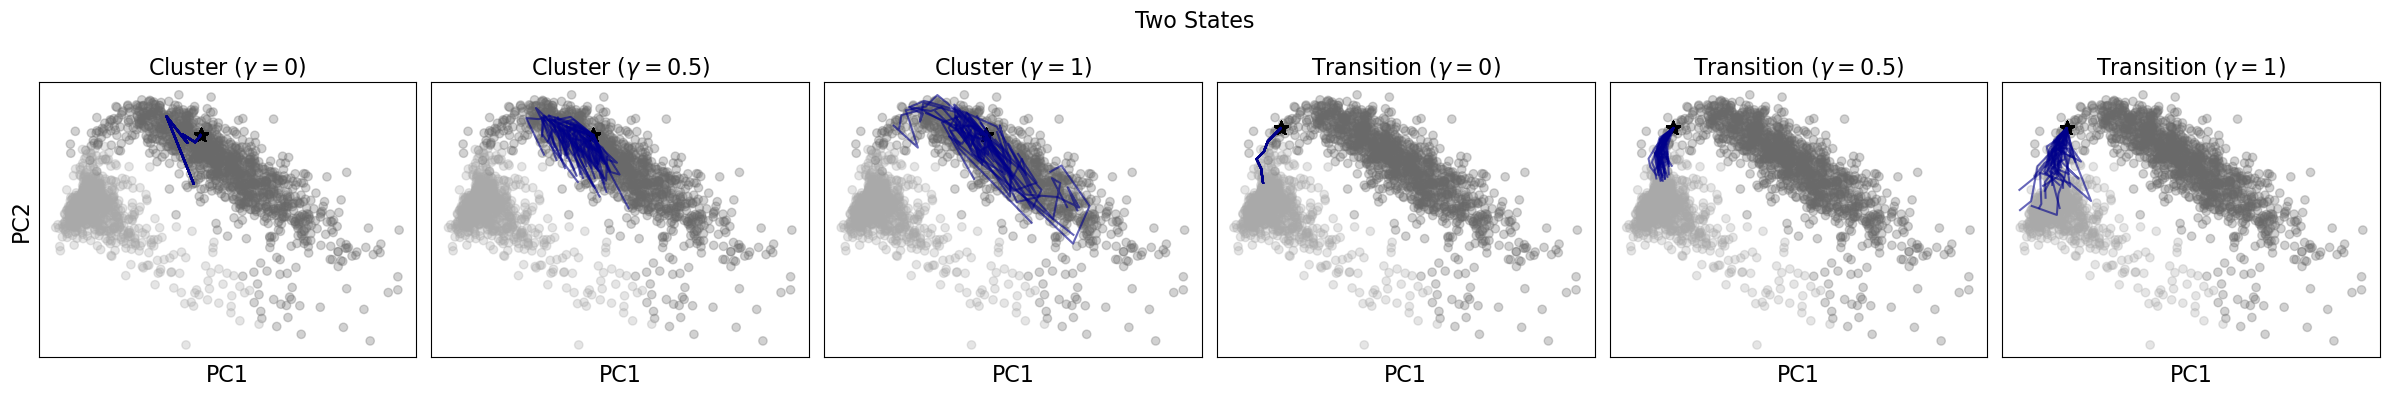

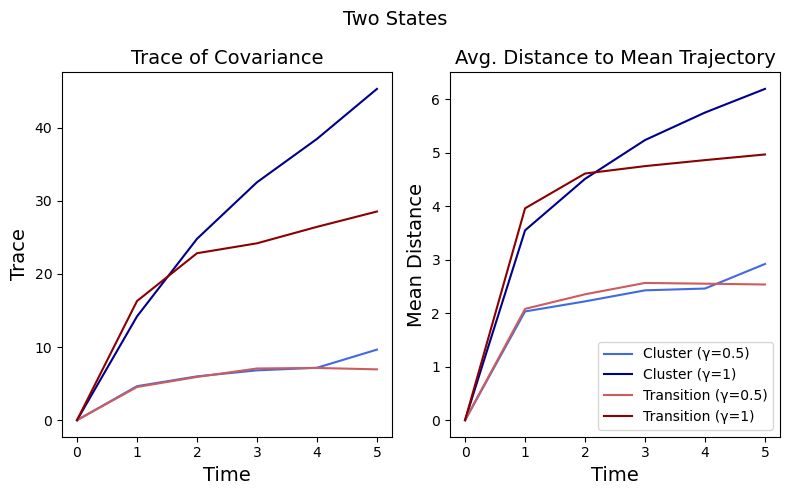

In [17]:
# 2 States
W_r, W_n, W_o = load_weights("TrainedModels/Two/hidden_150/input_100/seed_0/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Two States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

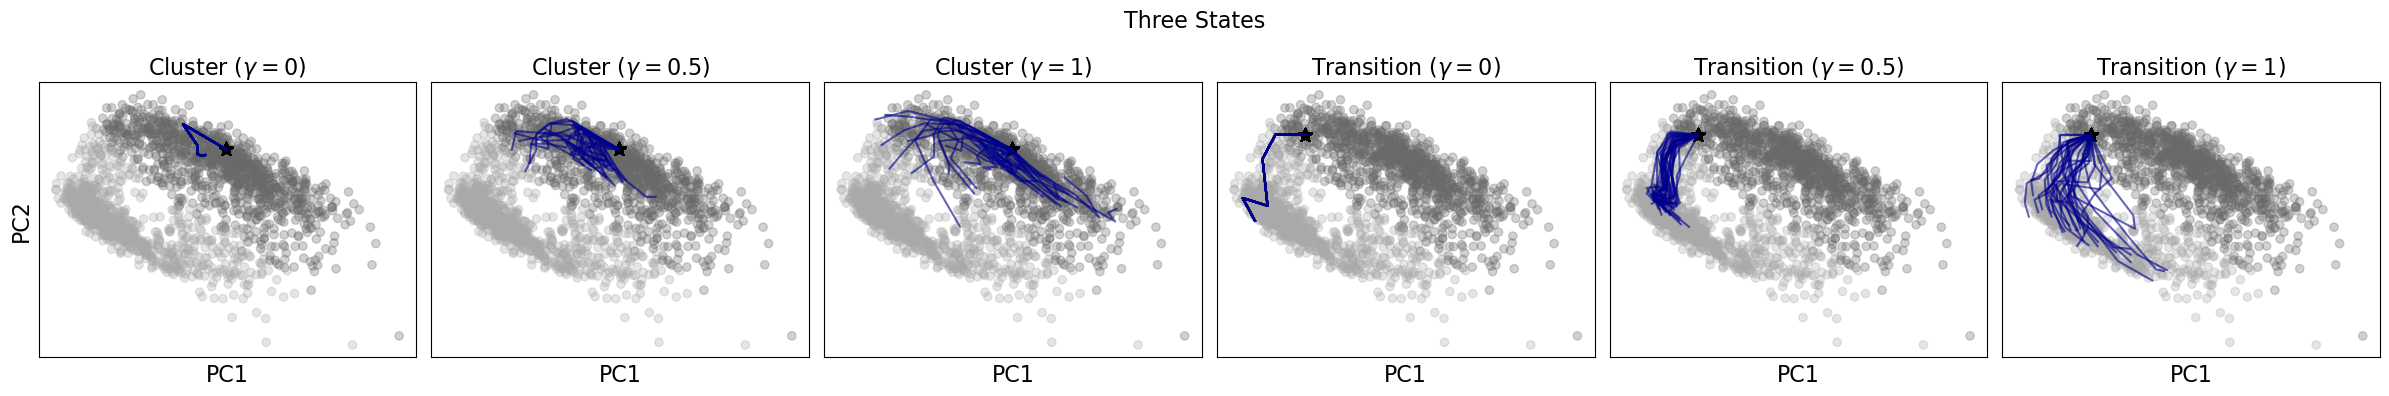

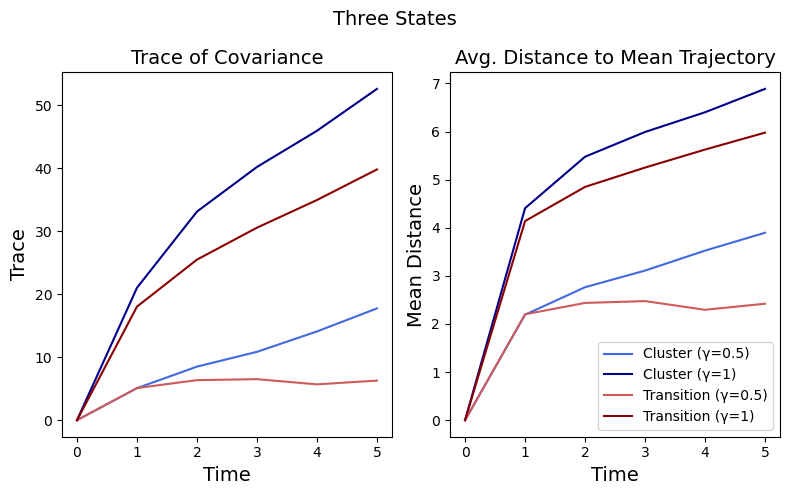

In [23]:
# 3 States
W_r, W_n, W_o = load_weights("TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Three States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

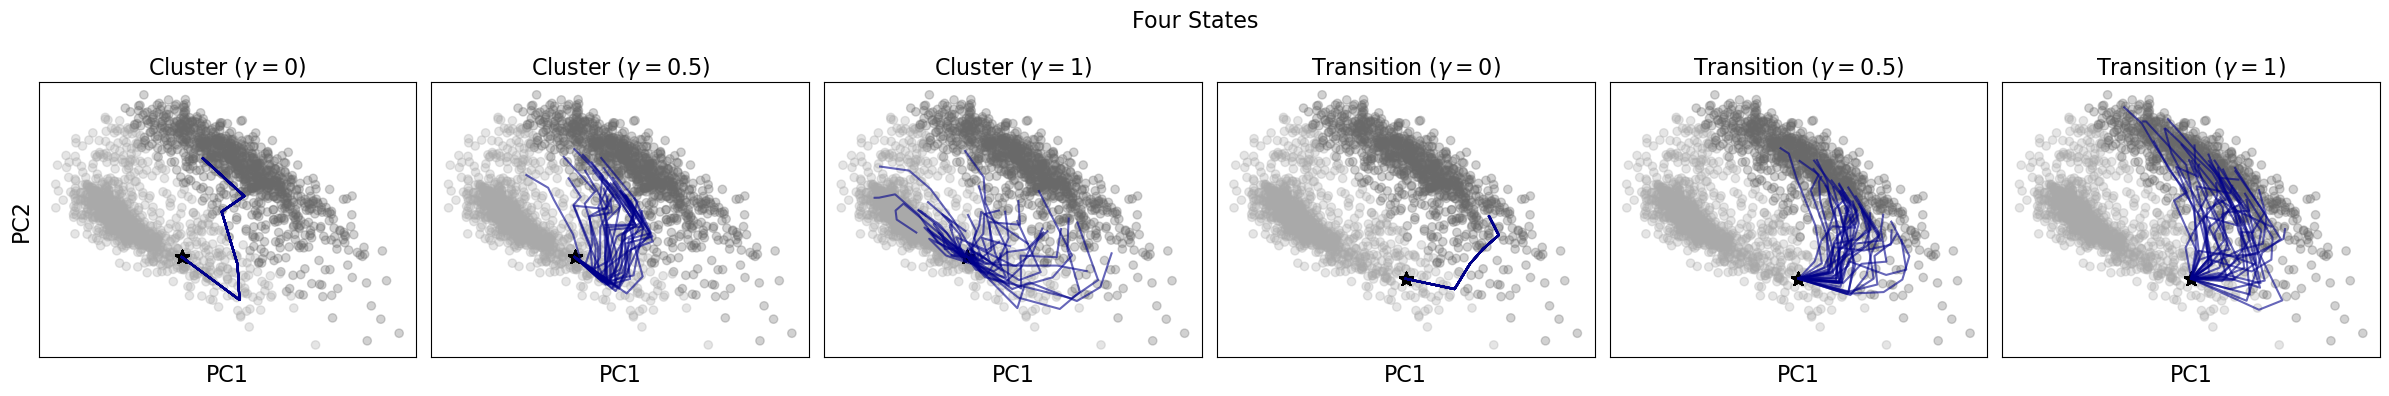

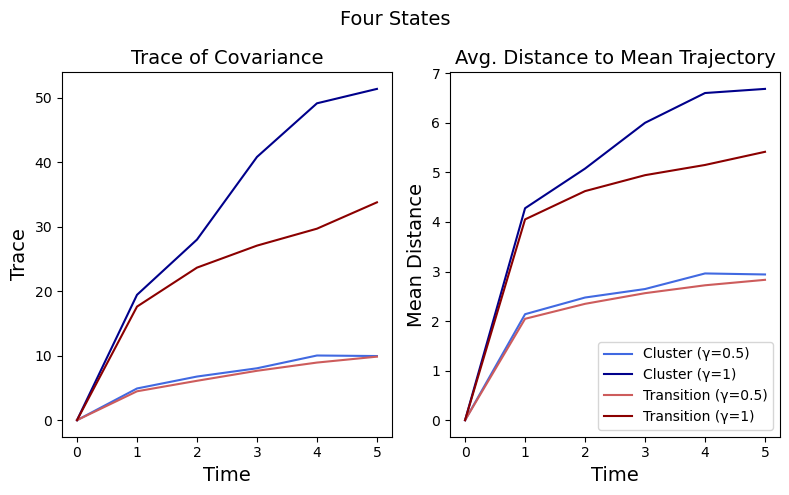

In [34]:
# 4 States
W_r, W_n, W_o = load_weights("TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Four States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

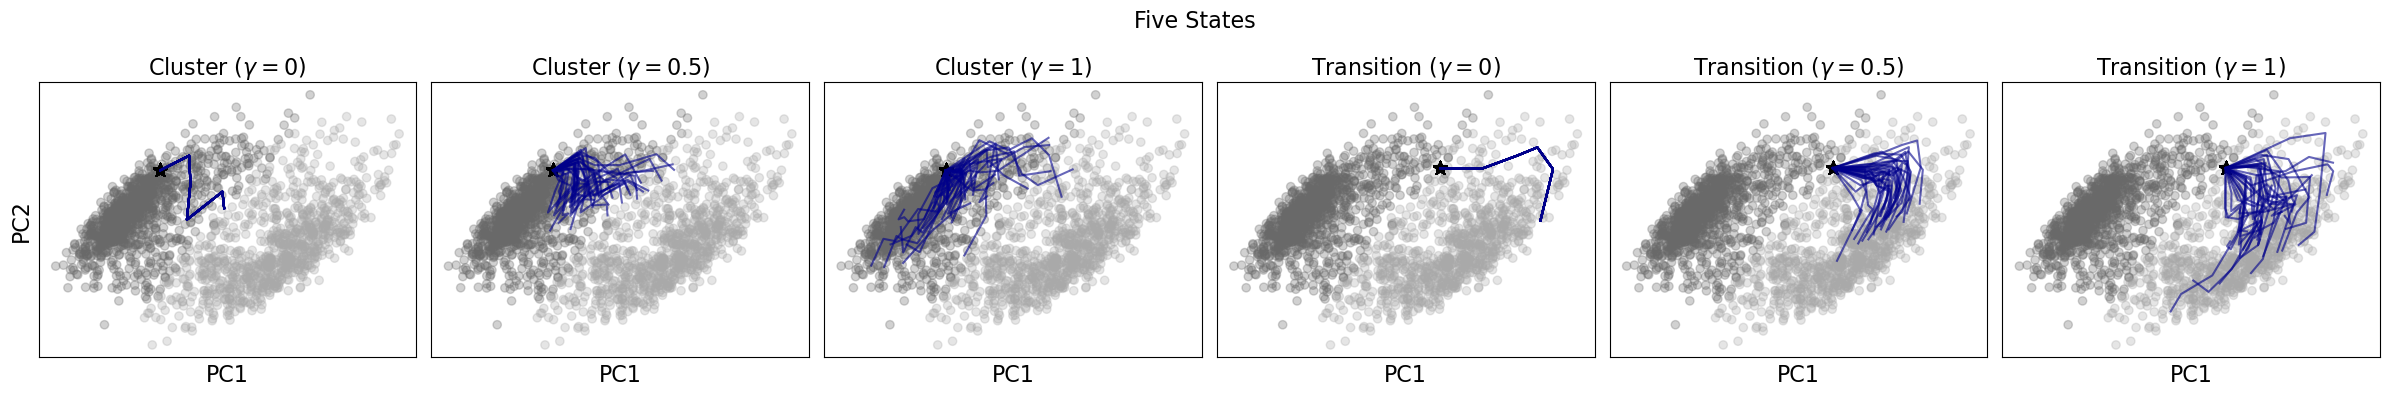

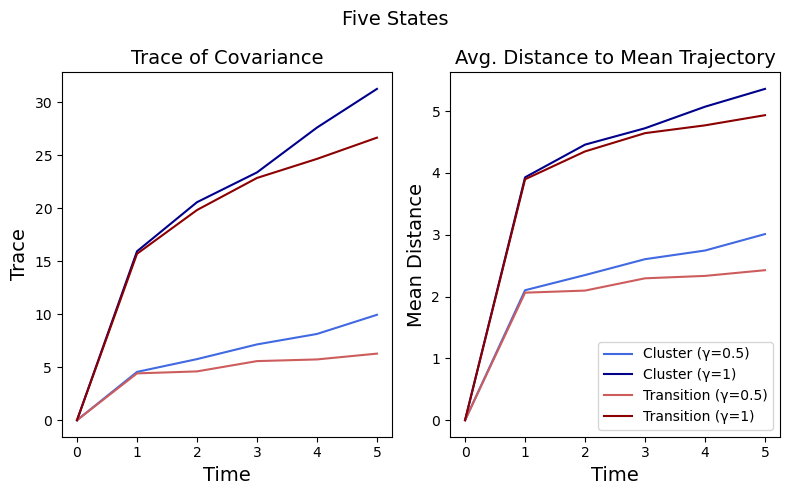

In [45]:
# 5 States
W_r, W_n, W_o = load_weights("TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth")
h_track, o_track, noise_vec, tt, tk, tc = locate_areas(W_r, W_n, W_o, thr_fr=9)
noise_sensitivity("Five States", W_r, W_n, o_track, h_track, noise_vec, tc, tk, gamm_noise_vals=[0,0.5,1], T=5, trajs=100)

## Mechanistic Interpretability

Here we uncover the neuronal circuit on a single RNN model trained on a HMM with 2 latent states contained in TrainedModel/ReverseEngineeredModel 

### Kick Neurons

In [ ]:
neuron_activities("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")

### Noise Integrating Populations

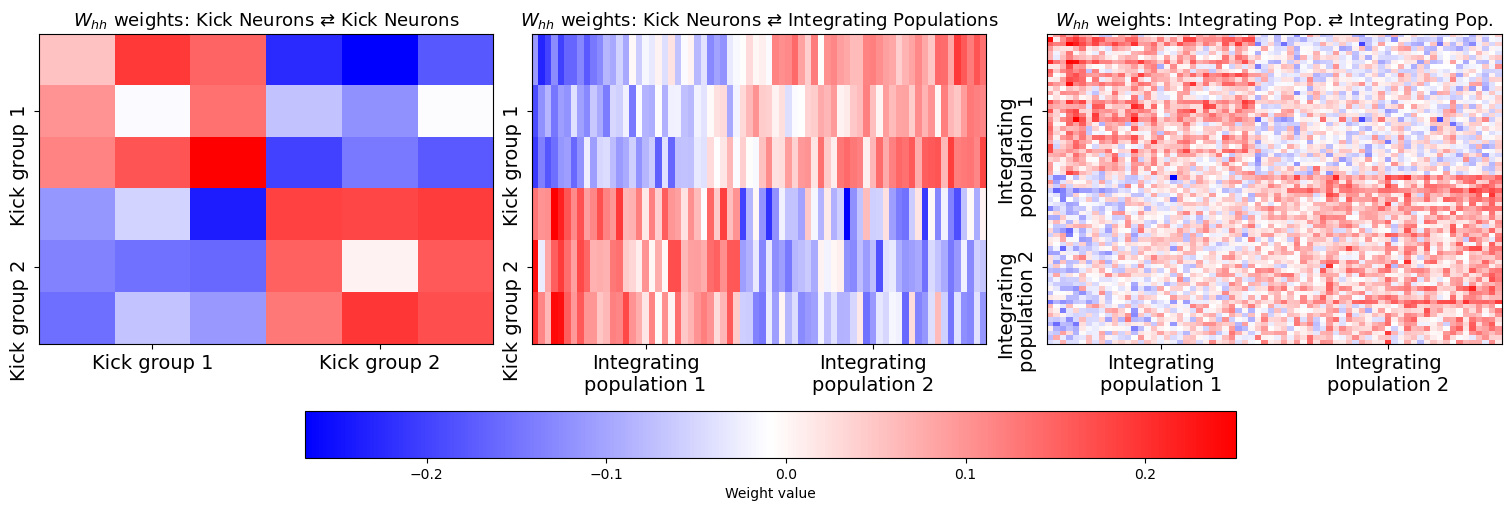

In [2]:
W_r, _, _ = load_weights("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")
weight_matrices(W_r)

### Oscillations in Mean Activity of Kick Neurons and Noise Integrating Populations

In [ ]:
mean_activities("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth")

### Ablation Studies

In [ ]:
# Ablation of Kick-Group 1 & associated Noise on Integrating Populations
ablation("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", group=0)

In [ ]:
# Ablation of Kick-Group 2 & associated Noise on Integrating Populations
ablation("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", group=1)

## Supplementary

In [ ]:
manager = Manager(config_name="HMMThreeTriangularFully")
results = manager.run_experiment(verbose=True)

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
from scripts.rnn import RNN

def analyze_rnn_hidden_states(model_path, timesteps=1000, neuron_index=0, 
                             input_size=100, hidden_size=150, output_size=3,
                             device=None, show_arrows=True, arrow_density=20,
                             color_mode='binary', colormap='seismic'):
    """
    Analyze RNN hidden states and visualize trajectory.
    
    Parameters:
    -----------
    color_mode : str
        'binary' for binary coloring (positive/negative), 
        'continuous' for continuous colormap based on pre-activation values
    colormap : str
        Matplotlib colormap name (e.g., 'seismic', 'RdBu', 'coolwarm')
    """
    
    # Set device
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    input_size=100 
    hidden_size=150 
    output_size=3
    
    # Load RNN model
    rnn = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
    rnn.load_state_dict(torch.load(model_path, map_location=device))
    rnn.eval()
    
    # Extract weights
    ih = rnn.rnn.weight_ih_l0.data
    hh = rnn.rnn.weight_hh_l0.data
    
    # Initialize hidden state
    h = torch.normal(0, 1, size=(hidden_size,), device=device)
    
    # Simulate RNN dynamics
    hidden_states = []
    neuron_activities = []
    
    with torch.no_grad():
        for t in range(timesteps):
            # Generate random input
            x = torch.normal(0, 1, size=(input_size,), device=device)
            
            # Compute pre-activation
            pre_act = h @ hh.T + x @ ih.T
            
            # Apply activation (ReLU)
            h = torch.relu(pre_act)
            
            # Store states
            hidden_states.append(h.cpu().numpy())
            neuron_activities.append(pre_act[neuron_index].cpu().item())
    
    # Convert to numpy arrays
    hidden_states = np.array(hidden_states)
    neuron_activities = np.array(neuron_activities)
    
    # Apply PCA to hidden states
    pca = PCA(n_components=2)
    hidden_states_pca = pca.fit_transform(hidden_states)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(8, 7))
    
    # Create trajectory using LineCollection
    points = hidden_states_pca.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create LineCollection
    lc = LineCollection(segments, linewidths=2, alpha=0.8)
    
    # Set colors based on mode
    if color_mode == 'binary':
        # Binary coloring: red for positive, blue for non-positive
        colors = ['blue' if activity <= 0 else 'red' for activity in neuron_activities[:-1]]
        lc.set_colors(colors)
        
        # Add the trajectory to the plot
        line = ax.add_collection(lc)
        
        # Add custom legend for color coding
        from matplotlib.lines import Line2D
        color_legend_elements = [
            Line2D([0], [0], color='red', lw=3, label='Positive Pre-activation'),
            Line2D([0], [0], color='blue', lw=3, label='Zero/Negative Pre-activation')
        ]
        ax.legend(handles=color_legend_elements, loc='upper left', fontsize=12)
        
    elif color_mode == 'continuous':
        # Continuous coloring based on pre-activation values
        # Center the colormap around zero
        vmax = np.max(np.abs(neuron_activities))
        vmin = -vmax
        
        # Create normalization centered around zero
        norm = Normalize(vmin=vmin, vmax=vmax)
        
        # Set colors using the colormap
        lc.set_array(neuron_activities[:-1])
        lc.set_cmap(colormap)
        lc.set_norm(norm)
        
        # Add the trajectory to the plot
        line = ax.add_collection(lc)
        
        # Add colorbar
        cbar = plt.colorbar(line, ax=ax, shrink=0.8)
        cbar.set_label(f'Neuron {neuron_index} Pre-activation', fontsize=12)
    
    # Add directional arrows along the trajectory
    if show_arrows and arrow_density > 0:
        arrow_spacing = max(1, timesteps // arrow_density)
        for i in range(arrow_spacing, timesteps - arrow_spacing, arrow_spacing):
            # Calculate direction vector
            dx = hidden_states_pca[i+1, 0] - hidden_states_pca[i, 0]
            dy = hidden_states_pca[i+1, 1] - hidden_states_pca[i, 1]
            
            # Add arrow
            ax.annotate('', 
                       xy=(hidden_states_pca[i, 0] + dx*0.5, hidden_states_pca[i, 1] + dy*0.5),
                       xytext=(hidden_states_pca[i, 0] - dx*0.5, hidden_states_pca[i, 1] - dy*0.5),
                       arrowprops=dict(arrowstyle='->', color='black', lw=1.5, alpha=0.7),
                       zorder=4)
    
    # Mark the starting point
    ax.plot(hidden_states_pca[0, 0], hidden_states_pca[0, 1], 'go', markersize=10, 
            label='Start', zorder=5, markeredgecolor='black', markeredgewidth=1)
    
    # Mark the ending point
    ax.plot(hidden_states_pca[-1, 0], hidden_states_pca[-1, 1], 'ro', markersize=10, 
            label='End', zorder=5, markeredgecolor='black', markeredgewidth=1)
    
    # Set axis limits with some padding
    x_padding = (hidden_states_pca[:, 0].max() - hidden_states_pca[:, 0].min()) * 0.1
    y_padding = (hidden_states_pca[:, 1].max() - hidden_states_pca[:, 1].min()) * 0.1
    ax.set_xlim(hidden_states_pca[:, 0].min() - x_padding, hidden_states_pca[:, 0].max() + x_padding)
    ax.set_ylim(hidden_states_pca[:, 1].min() - y_padding, hidden_states_pca[:, 1].max() + y_padding)
    
    # Labels and formatting
    ax.set_xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.3f})', fontsize=14)
    ax.set_ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.3f})', fontsize=14)
    
    # Update title based on color mode
    if color_mode == 'binary':
        title = f'Hidden State Trajectory (T={timesteps}) - Binary Coloring by Neuron {neuron_index}'
    else:
        title = f'Hidden State Trajectory (T={timesteps}) - Continuous Coloring by Neuron {neuron_index}'
    
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Remove ticks for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add legend for start/end points (only if not already added for binary mode)
    if color_mode == 'continuous':
        ax.legend(loc='upper right', fontsize=12)
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Return results
    return {
        'hidden_states': hidden_states,
        'neuron_activities': neuron_activities,
        'pca_projection': hidden_states_pca,
        'pca_model': pca
    }

In [ ]:
neurons = [2, 110, 144, 101, 113, 32]

In [ ]:
model_path = "/home/elia/Documents/rnnrep/TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth"
a = analyze_rnn_hidden_states(model_path, timesteps=5000, neuron_index=83, show_arrows=True, arrow_density=0, color_mode='continuous', colormap='seismic')

In [ ]:
#model_path = "/home/elia/Documents/rnnrep/TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
#model_path = "/home/elia/Documents/rnnrep/TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth"
#model_path = "TrainedModels/Two/hidden_150/input_100/seed_1/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth"
model_path = "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth"
a = analyze_rnn_hidden_states(model_path, timesteps=3000, neuron_index=149, show_arrows=True, arrow_density=0, color_mode='continuous', colormap='seismic')

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_weights(path):
    weights = torch.load(path, map_location=torch.device('cpu'), weights_only=True)
    return (weights["rnn.weight_hh_l0"].cpu().numpy(), 
            weights["rnn.weight_ih_l0"].cpu().numpy(),
            weights["fc.weight"].cpu().numpy())

def relu(x):
    return np.maximum(0, x)

def forward_with_injection(W_r, W_n, h, noise, neuron_indices=None, mu=1.0):
    modification = np.ones(W_r.shape[0])
    if neuron_indices is not None:
        modification[neuron_indices] = mu
    pre_act = (h @ W_r.T + noise @ W_n.T) * modification
    return relu(pre_act)

def compute_logits(W_o, h):
    return h @ W_o.T

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits)

def generate_initial_condition(W_r, W_n, W_o, target_logit_idx=0, logit_threshold=0.9, 
                             warmup_steps=2000, sigma=1.0, max_attempts=10000):
    for _ in range(max_attempts):
        h = np.random.normal(0, 0.1, W_r.shape[0])
        states = []
        for _ in range(warmup_steps):
            noise = np.random.normal(0, sigma, W_n.shape[1])
            h = relu(h @ W_r.T + noise @ W_n.T)
            states.append(h.copy())
        
        valid_states = [state for state in states 
                       if softmax(compute_logits(W_o, state))[target_logit_idx] > logit_threshold]
        if valid_states:
            return states, valid_states[np.random.randint(len(valid_states))]
    raise RuntimeError(f"Failed to find valid initial condition after {max_attempts} attempts")

def check_logit_switch(logits, target_logit_idx, final_logit_idx):
    """
    Updated version that checks for switch from target_logit_idx to final_logit_idx
    """
    probs = softmax(logits)
    max_prob_idx = np.argmax(probs)
    # Check if max probability switches from target_logit_idx to final_logit_idx
    return max_prob_idx == final_logit_idx

def simple_ablation_plot(model_path, neurons, n_steps=100, sigma=1.0, warmup_steps=2000, 
                        target_logit_idx=0, final_logit_idx=2, logit_threshold=0.9, n_ablated_trajectories=100):
    """
    Updated simple_ablation_plot function with final_logit_idx parameter
    """
    W_r, W_n, W_o = load_weights(model_path)
    states, h0 = generate_initial_condition(W_r, W_n, W_o, target_logit_idx, logit_threshold, 
                                          warmup_steps, sigma)
    
    # Store trajectories for plotting
    h_normal_list = []
    h_ablated_list = []
    switch_count = 0
    
    # Generate trajectory pairs with resampled noise for each pair
    for traj_idx in range(n_ablated_trajectories):
        # Generate unique noise sequence for this trajectory pair
        noise_sequence = np.random.normal(0, sigma, (n_steps, W_n.shape[1]))
        
        # Normal trajectory with this noise
        h_normal = [h0.copy()]
        h_current = h0.copy()
        for t in range(n_steps):
            h_current = forward_with_injection(W_r, W_n, h_current, noise_sequence[t])
            h_normal.append(h_current.copy())
        h_normal_list.append(np.array(h_normal))
        
        # Ablated trajectory with the same noise
        h_ablated = [h0.copy()]
        h_current = h0.copy()
        trajectory_switched = False
        
        for t in range(n_steps):
            h_current = forward_with_injection(W_r, W_n, h_current, noise_sequence[t], 
                                             neurons, mu=0.0)
            h_ablated.append(h_current.copy())
            
            # Check for logit switch at every timestep using updated function
            if not trajectory_switched:  # Only check if we haven't already detected a switch
                logits = compute_logits(W_o, h_current)
                if check_logit_switch(logits, target_logit_idx, final_logit_idx):
                    trajectory_switched = True
        
        # Count this trajectory if it switched at any point
        if trajectory_switched:
            switch_count += 1
            
        h_ablated_list.append(np.array(h_ablated))
    
    # Select first trajectory pair for plotting
    h_normal = h_normal_list[0]
    h_ablated = h_ablated_list[0]
    
    # PCA
    pca = PCA(n_components=2)
    pca.fit(states)
    h_normal_pca = pca.transform(h_normal)
    h_ablated_pca = pca.transform(h_ablated)
    h0_pca = pca.transform(h0.reshape(1, -1))[0]
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(h_normal_pca[:, 0], h_normal_pca[:, 1], 'gray', label='Normal')
    ax.plot(h_ablated_pca[:, 0], h_ablated_pca[:, 1], 'blue', 
            label=f'Ablated (neurons {neurons})')
    ax.scatter(h0_pca[0], h0_pca[1], c='black', s=100, marker='*', label='Start')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Calculate switch percentage
    switch_percentage = (switch_count / n_ablated_trajectories) * 100
    print(f"Percentage of ablated trajectories with logit switch (logit {target_logit_idx} → logit {final_logit_idx}): {switch_percentage:.2f}%")
    
    plt.show()
    return fig, switch_percentage

In [ ]:
#model_path = "/home/elia/Documents/rnnrep/TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
#model_path = "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth"
#model_path = "/home/elia/Documents/rnnrep/TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth"
#model_path = "/home/elia/Documents/rnnrep/Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth"
#model_path = "TrainedModels/Two/hidden_150/input_100/seed_1/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth"
model_path = "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth"
#2 states
#neurons = [83, 59, 6]
#neurons = [114, 142, 28]
#3 states
#neurons = [100, 119, 111, 50, 132]
#neurons = [6, 17, 144, 39, 77, 63, 93, 129]
#[39, 77, 93, 129, 6, 17, 144, 5, 82, 100, 119, 111, 50, 132]
#4 states
#neurons = [39, 63, 77, 93, 144]
neurons = [2, 50, 100, 111, 119]
#5 states
#neurons = [46, 88, 84, 130, 134, 111]
#neurons = [110, 2, 144, 101, 45, 113]
#neurons = [10, 55, 99, 56, 38] # from 0 to 2
#neurons = [31, 75, 79, 91, 73] # from 2 to 0
# fully connected
#neurons = [34, 58, 81, 125, 82, 49] #from 0 to 2
# New seed 2 states
#neurons = [33, 109, 119] #from 2 to 0
#neurons = [2, 58, 110] #from 0 to 2
simple_ablation_plot(model_path, neurons, n_steps=500, sigma=1.0, warmup_steps=2000, target_logit_idx=2, final_logit_idx=0, logit_threshold=0.92, n_ablated_trajectories=10)

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm

def load_weights(path):
    weights = torch.load(path, map_location=torch.device('cpu'), weights_only=True)
    return (weights["rnn.weight_hh_l0"].cpu().numpy(), 
            weights["rnn.weight_ih_l0"].cpu().numpy(),
            weights["fc.weight"].cpu().numpy())

def relu(x):
    return np.maximum(0, x)

def forward_with_injection(W_r, W_n, h, noise, neuron_indices=None, mu=1.0):
    modification = np.ones(W_r.shape[0])
    if neuron_indices is not None:
        modification[neuron_indices] = mu
    pre_act = (h @ W_r.T + noise @ W_n.T) * modification
    return relu(pre_act)

def compute_logits(W_o, h):
    return h @ W_o.T

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits)

def get_dominant_logit(logits):
    """Get the index of the dominant (highest) logit"""
    return np.argmax(logits)

def generate_initial_condition(W_r, W_n, W_o, target_logit_idx=0, logit_threshold=0.9, 
                             warmup_steps=2000, sigma=1.0, max_attempts=10000):
    for _ in range(max_attempts):
        h = np.random.normal(0, 0.1, W_r.shape[0])
        states = []
        for _ in range(warmup_steps):
            noise = np.random.normal(0, sigma, W_n.shape[1])
            h = relu(h @ W_r.T + noise @ W_n.T)
            states.append(h.copy())
        
        valid_states = [state for state in states 
                       if softmax(compute_logits(W_o, state))[target_logit_idx] > logit_threshold]
        if valid_states:
            return states, valid_states[np.random.randint(len(valid_states))]
    raise RuntimeError(f"Failed to find valid initial condition after {max_attempts} attempts")

def check_logit_switch(logits, target_logit_idx, final_logit_idx):
    """
    Updated version that checks for switch from target_logit_idx to final_logit_idx
    """
    probs = softmax(logits)
    max_prob_idx = np.argmax(probs)
    # Check if max probability switches from target_logit_idx to final_logit_idx
    return max_prob_idx == final_logit_idx

def simple_ablation_plot(model_path, neurons, n_steps=100, sigma=1.0, warmup_steps=2000, 
                        target_logit_idx=0, final_logit_idx=2, logit_threshold=0.9, 
                        n_ablated_trajectories=100):
    """
    Updated simple_ablation_plot function with colored trajectory based on dominant logit
    """
    W_r, W_n, W_o = load_weights(model_path)
    states, h0 = generate_initial_condition(W_r, W_n, W_o, target_logit_idx, logit_threshold, 
                                          warmup_steps, sigma)
    
    # Store trajectories for plotting
    h_normal_list = []
    h_ablated_list = []
    dominant_logits_list = []
    switch_count = 0
    
    # Generate trajectory pairs with resampled noise for each pair
    for traj_idx in range(n_ablated_trajectories):
        # Generate unique noise sequence for this trajectory pair
        noise_sequence = np.random.normal(0, sigma, (n_steps, W_n.shape[1]))
        
        # Normal trajectory with this noise
        h_normal = [h0.copy()]
        h_current = h0.copy()
        for t in range(n_steps):
            h_current = forward_with_injection(W_r, W_n, h_current, noise_sequence[t])
            h_normal.append(h_current.copy())
        h_normal_list.append(np.array(h_normal))
        
        # Ablated trajectory with the same noise
        h_ablated = [h0.copy()]
        dominant_logits = []
        h_current = h0.copy()
        trajectory_switched = False
        
        # Get dominant logit for initial state
        initial_logits = compute_logits(W_o, h_current)
        dominant_logits.append(get_dominant_logit(initial_logits))
        
        for t in range(n_steps):
            h_current = forward_with_injection(W_r, W_n, h_current, noise_sequence[t], 
                                             neurons, mu=0.0)
            h_ablated.append(h_current.copy())
            
            # Get dominant logit for this timestep
            logits = compute_logits(W_o, h_current)
            dominant_logits.append(get_dominant_logit(logits))
            
            # Check for logit switch at every timestep using updated function
            if not trajectory_switched:  # Only check if we haven't already detected a switch
                if check_logit_switch(logits, target_logit_idx, final_logit_idx):
                    trajectory_switched = True
        
        # Count this trajectory if it switched at any point
        if trajectory_switched:
            switch_count += 1
            
        h_ablated_list.append(np.array(h_ablated))
        dominant_logits_list.append(np.array(dominant_logits))
    
    # Select first trajectory pair for plotting
    h_normal = h_normal_list[0]
    h_ablated = h_ablated_list[0]
    dominant_logits = dominant_logits_list[0]
    
    # PCA
    pca = PCA(n_components=2)
    pca.fit(states)
    h_normal_pca = pca.transform(h_normal)
    h_ablated_pca = pca.transform(h_ablated)
    h0_pca = pca.transform(h0.reshape(1, -1))[0]
    
    # Determine number of unique output classes for colormap
    n_classes = W_o.shape[0]  # Number of output logits
    colors = cm.get_cmap('tab10')(np.linspace(0, 1, n_classes))
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot normal trajectory in gray
    ax.plot(h_normal_pca[:, 0], h_normal_pca[:, 1], 'gray', label='Normal', linewidth=2, alpha=0.7)
    
    # Plot ablated trajectory with colors based on dominant logit
    for i in range(len(h_ablated_pca) - 1):
        color = colors[dominant_logits[i]]
        ax.plot(h_ablated_pca[i:i+2, 0], h_ablated_pca[i:i+2, 1], 
                color=color, linewidth=2, alpha=0.8)
    
    # Add starting point
    ax.scatter(h0_pca[0], h0_pca[1], c='black', s=100, marker='*', label='Start', zorder=5)
    
    # Create custom legend for output classes
    legend_elements = [plt.Line2D([0], [0], color='gray', linewidth=2, label='Normal')]
    for i in range(n_classes):
        legend_elements.append(plt.Line2D([0], [0], color=colors[i], linewidth=2, 
                                        label=f'Ablated (dominant logit {i})'))
    legend_elements.append(plt.Line2D([0], [0], marker='*', color='black', linewidth=0, 
                                    markersize=10, label='Start'))
    
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    ax.set_title(f'Trajectory Comparison (Ablated neurons: {neurons})')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Calculate switch percentage
    switch_percentage = (switch_count / n_ablated_trajectories) * 100
    print(f"Percentage of ablated trajectories with logit switch (logit {target_logit_idx} → logit {final_logit_idx}): {switch_percentage:.2f}%")
    
    plt.show()
    return fig, switch_percentage

In [21]:
def weight_matrices(W_r, vec):
    """Plot weight matrices for kick neurons and integrating populations."""
    # Create figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    
    # Define neuron indices for kick groups
    #vec = np.array([83, 6, 59, 114, 72, 28])
    
    # Plot 1: Kick Neurons ⇄ Kick Neurons
    axs[0].imshow(W_r[vec,:][:, vec], cmap='bwr', aspect='auto')
    axs[0].set_xticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], fontsize=14)
    axs[0].set_yticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], rotation=90, fontsize=14)
    axs[0].set_title("$W_{hh}$ weights: Kick Neurons ⇄ Kick Neurons", fontsize=13)
    
    # Calculate top-k integrating neurons
    topk = 50
    g1 = W_r[vec[:4],:].mean(axis=0)
    g2 = W_r[vec[4:],:].mean(axis=0)

    sortmap = np.argsort(g1*g2)

    g1 = g1[sortmap][:topk]
    g2 = g2[sortmap][:topk]
    sortmap2 = np.argsort(g1)
    final_map = sortmap[sortmap2[sortmap2<topk]]

    
    # Plot 2: Kick Neurons ⇄ Integrating Populations
    s1 = axs[1].imshow(W_r[vec, :][:, final_map], cmap='bwr', aspect='auto')
    axs[1].set_xticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], fontsize=14)
    axs[1].set_yticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], rotation=90, fontsize=14)
    axs[1].set_title("$W_{hh}$ weights: Kick Neurons ⇄ Integrating Populations", fontsize=13)
    
    # Plot 3: Integrating Populations ⇄ Integrating Populations
    axs[2].imshow(W_r[final_map, :][:, final_map], cmap='bwr', aspect='auto')
    axs[2].set_xticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], fontsize=14)
    axs[2].set_yticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], rotation=90, fontsize=14)
    axs[2].set_title("$W_{hh}$ weights: Integrating Pop. ⇄ Integrating Pop.", fontsize=13)
    
    # Add horizontal colorbar below all plots
    cbar = fig.colorbar(s1, ax=axs, orientation='horizontal', fraction=0.15, pad=0.05)
    cbar.set_label("Weight value")
    plt.show()

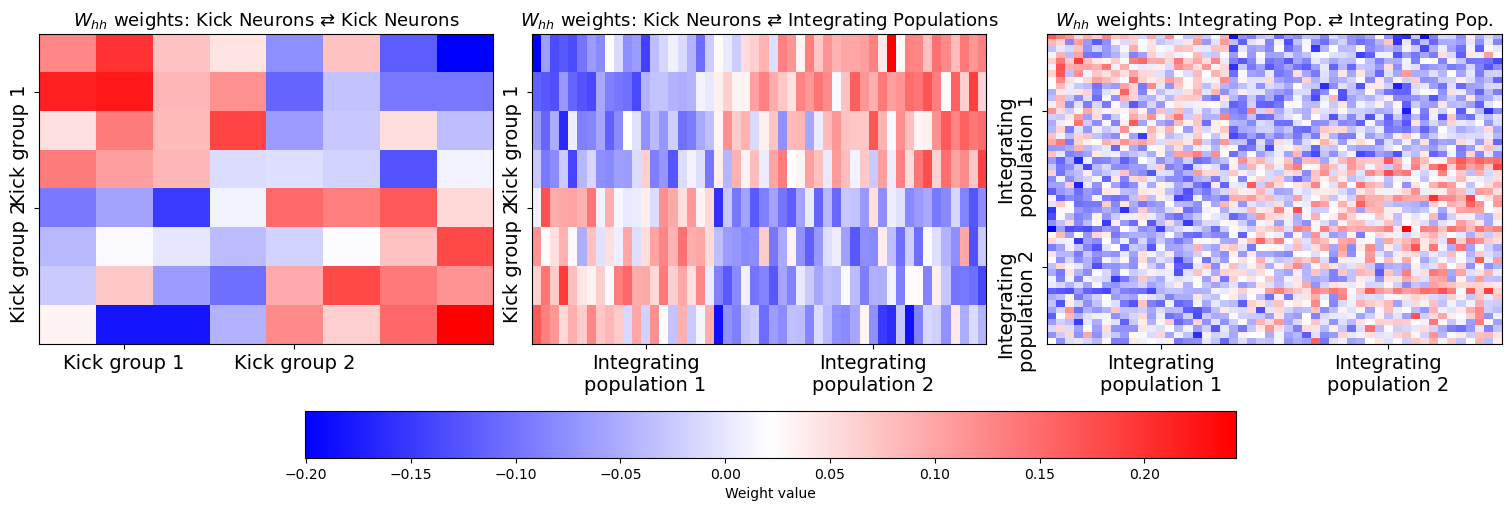

In [233]:
model_path = "/home/elia/Documents/rnnrep/TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
weights = load_weights(model_path)
from itertools import permutations
#list1 = [110, 144, 101, 113, 2]
#list2 = [46, 88, 84, 130, 134]
list1 = [10, 55, 99, 56] # from 0 to 2
list2 = [31, 75, 79, 91]
list1_perm = list(permutations(list1))
list2_perm = list(permutations(list2))
weight_matrices(weights[0], np.concatenate((list1, list2)))
#for i in range(len(list1_perm)):
#    print(np.concatenate((list1_perm[i], list2_perm[j])))
#    weight_matrices(weights[0], np.concatenate((list1_perm[i], list2_perm[j])))

In [ ]:
[100, 119, 111, 50, 132]

In [ ]:
def weight_matrices(W_r, vec):
    """Plot weight matrices for kick neurons and integrating populations."""
    # Create figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    
    # Define neuron indices for kick groups
    #vec = np.array([109, 33, 119, 2, 58, 110]) # 2 states new seed
    #vec = np.array([38, 55, 99, 31, 79, 91]) # 5 states

    
    # Plot 1: Kick Neurons ⇄ Kick Neurons
    axs[0].imshow(W_r[vec,:][:, vec], cmap='bwr', aspect='auto')
    axs[0].set_xticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], fontsize=14)
    axs[0].set_yticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], rotation=90, fontsize=14)
    axs[0].set_title("$W_{hh}$ weights: Kick Neurons ⇄ Kick Neurons", fontsize=13)
    
    # Calculate top-k integrating neurons
    topk = 50
    g1 = W_r[vec[:7],:].mean(axis=0)
    g2 = W_r[vec[7:],:].mean(axis=0)

    sortmap = np.argsort(g1*g2)

    g1 = g1[sortmap][:topk]
    g2 = g2[sortmap][:topk]
    sortmap2 = np.argsort(g1)
    final_map = sortmap[sortmap2[sortmap2<topk]]

    
    # Plot 2: Kick Neurons ⇄ Integrating Populations
    s1 = axs[1].imshow(W_r[vec, :][:, final_map], cmap='bwr', aspect='auto')
    axs[1].set_xticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], fontsize=14)
    axs[1].set_yticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], rotation=90, fontsize=14)
    axs[1].set_title("$W_{hh}$ weights: Kick Neurons ⇄ Integrating Populations", fontsize=13)
    
    # Plot 3: Integrating Populations ⇄ Integrating Populations
    axs[2].imshow(W_r[final_map, :][:, final_map], cmap='bwr', aspect='auto')
    axs[2].set_xticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], fontsize=14)
    axs[2].set_yticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], rotation=90, fontsize=14)
    axs[2].set_title("$W_{hh}$ weights: Integrating Pop. ⇄ Integrating Pop.", fontsize=13)
    
    # Add horizontal colorbar below all plots
    cbar = fig.colorbar(s1, ax=axs, orientation='horizontal', fraction=0.15, pad=0.05)
    cbar.set_label("Weight value")
    plt.show()

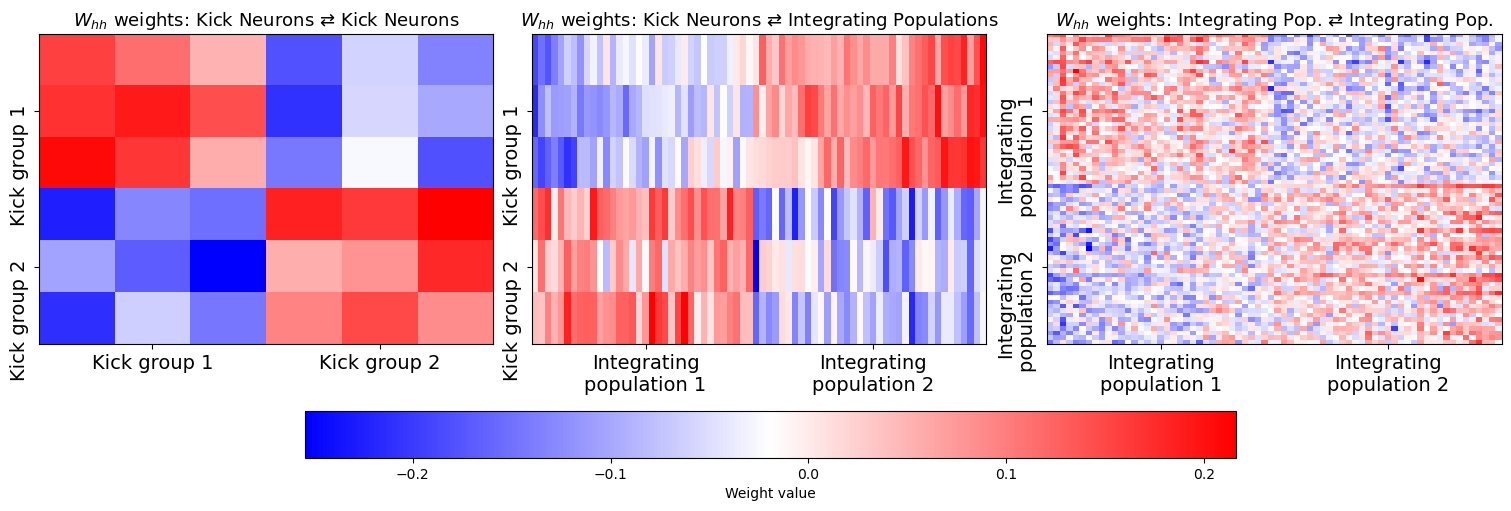

In [162]:
model_path = "TrainedModels/Two/hidden_150/input_100/seed_1/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth"
weights = load_weights(model_path)
weight_matrices(weights[0], np.array([109, 33, 119, 2, 58, 110]))

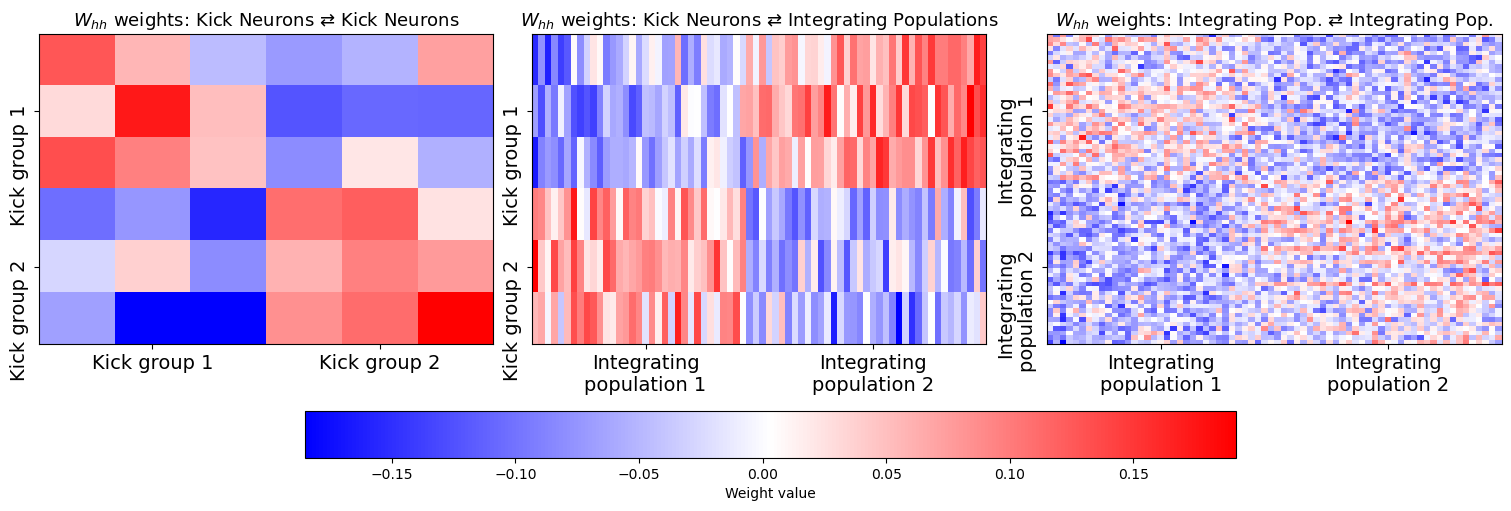

In [163]:
model_path = "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
weights = load_weights(model_path)
weight_matrices(weights[0], np.array([38, 55, 99, 31, 79, 91]))

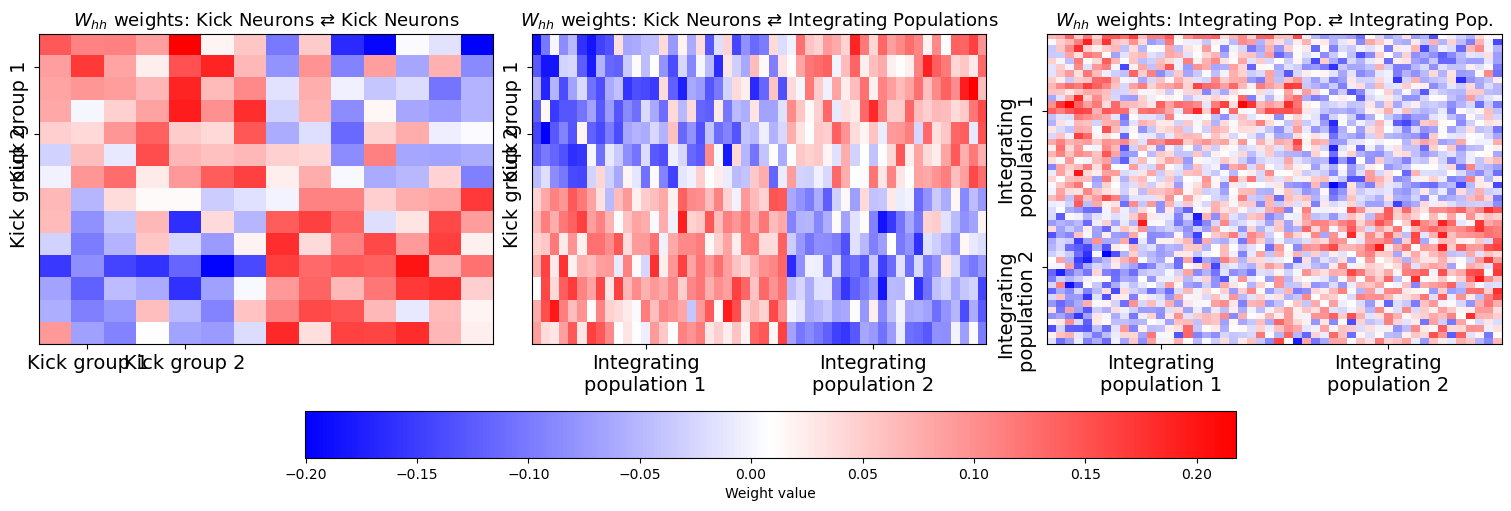

In [249]:
model_path = "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth"
weights = load_weights(model_path)
weight_matrices(weights[0], np.array([39, 77, 93, 144, 129, 6, 17, 5, 82, 100, 119, 111, 50, 132]))

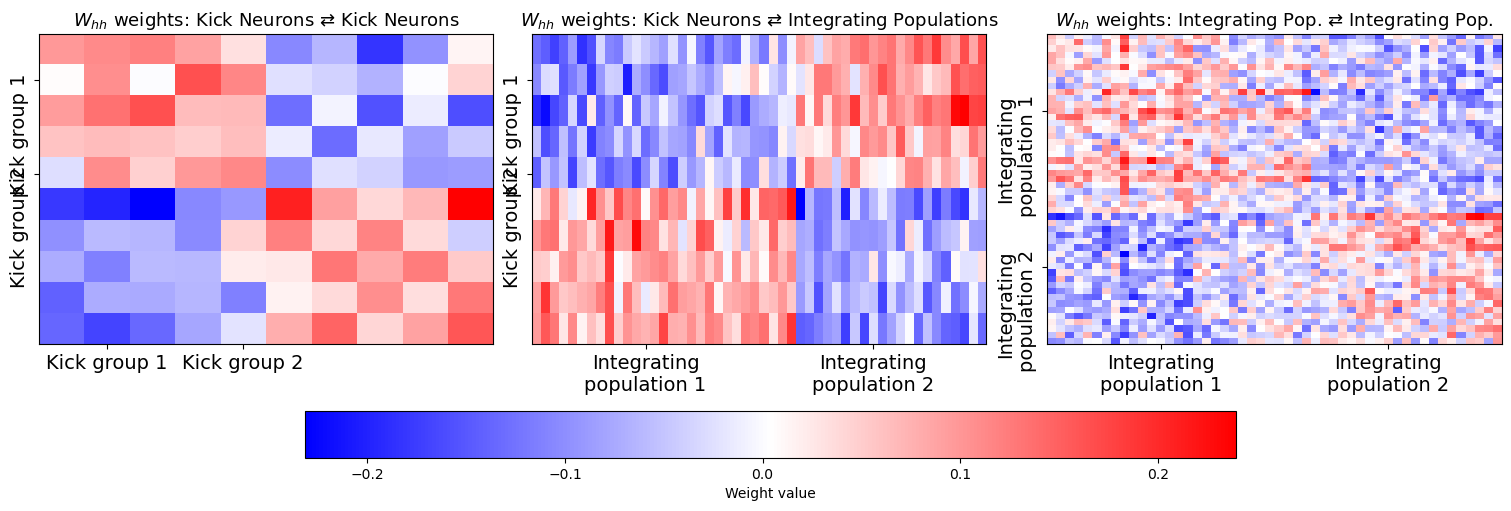

In [23]:
model_path = "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth"
weights = load_weights(model_path)
weight_matrices(weights[0], np.array([39, 63, 77, 93, 144, 2, 50, 100, 119, 111]))

In [305]:
from matplotlib.cm import ScalarMappable
def neuron_activities(model_path, initial_hidden_states=None, specified_neurons=[109, 33, 119, 2, 58, 110], n_steps=1000, device=None):
    """Simulate RNN trajectories and plot the activities of specified neurons, given a model path."""
    # Set device
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Model parameters
    input_size = 100
    hidden_size = 150
    num_layers = 1
    output_size = 3

    # Load the RNN model
    rnn = RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
    rnn.load_state_dict(torch.load(model_path, map_location=device))
    rnn.eval()

    # Extract weights
    ih = rnn.rnn.weight_ih_l0.data
    hh = rnn.rnn.weight_hh_l0.data
    # fc = rnn.fc.weight.data  # Not used in simulation

    # Handle initial hidden states
    if initial_hidden_states is None:
        # Default to 1 trajectory with random initial state if none provided
        n_trajectories = 1
        initial_hidden_states = torch.normal(0, 1, size=(n_trajectories, hidden_size), device=device)
    else:
        initial_hidden_states = initial_hidden_states.to(device)
        n_trajectories = initial_hidden_states.shape[0]

    # Initialize tensors for simulation
    step_norm = torch.zeros((n_trajectories, n_steps, hidden_size), device=device)
    pre_activations = torch.zeros((n_trajectories, n_steps, len(specified_neurons)), device=device)
    step_norm[:, 0, :] = initial_hidden_states

    # Simulate the RNN for n_steps
    with torch.no_grad():
        for i in range(n_trajectories):
            for j in range(n_steps - 1):
                x = torch.normal(0, 1, size=(input_size,), device=device)
                pre_act = step_norm[i, j, :] @ hh.T + x @ ih.T
                step_norm[i, j + 1, :] = torch.relu(pre_act)
                pre_activations[i, j, :] = pre_act[specified_neurons]
            # Last step pre-activation
            x = torch.normal(0, 1, size=(input_size,), device=device)
            pre_activations[i, n_steps - 1, :] = (step_norm[i, n_steps - 1, :] @ hh.T + x @ ih.T)[specified_neurons]

    # Convert to numpy
    step_norm = step_norm.cpu().numpy()
    pre_activations = pre_activations.cpu().numpy()

    # Fit and apply PCA
    pca = PCA(n_components=2)
    step_norm_flat = step_norm.reshape(-1, hidden_size)
    pca.fit(step_norm_flat)
    step_norm_pca = pca.transform(step_norm_flat).reshape(n_trajectories, n_steps, 2)

    # Determine color range
    global_min = pre_activations.min()
    global_max = pre_activations.max()
    cmap = plt.get_cmap('seismic')

    # Create 2x3 subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)

    # Plot trajectories for each neuron
    for row in range(2):
        for col in range(3):
            ax = axes[row, col]
            neuron_pos = row * 3 + col
            for i in range(n_trajectories):
                points = step_norm_pca[i, :, :]
                segments = np.array([points[j:j+2] for j in range(n_steps - 1)])
                colors = pre_activations[i, :-1, neuron_pos]
                lc = LineCollection(segments, cmap=cmap, alpha=0.5)
                lc.set_array(colors)
                ax.add_collection(lc)
                ax.scatter(points[:, 0], points[:, 1], c=pre_activations[i, :, neuron_pos], 
                           cmap=cmap, s=10, alpha=0.7)
            ax.set_xlabel('PC1', fontsize=14)
            ax.set_ylabel('PC2', fontsize=14)
            ax.set_xticks([])
            ax.set_yticks([])

    # Add colorbar
    sm = ScalarMappable(cmap=cmap)
    sm.set_array(np.linspace(global_min, global_max, 100))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), label='Pre-Activation Value', 
                        orientation='vertical', fraction=0.02, pad=0.1)
    cbar.set_label('Pre-Activation Value', fontsize=14)
    cbar.ax.tick_params(labelsize=14)

    plt.show()

/tmp/ipykernel_193922/683958684.py:16: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



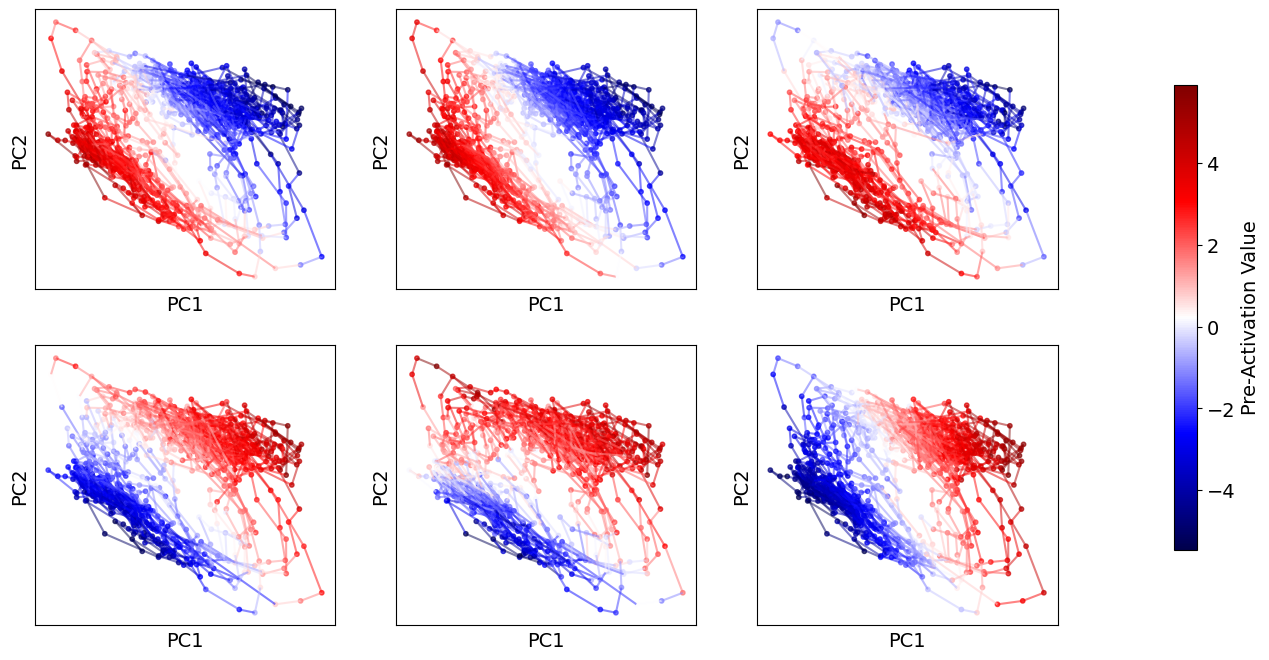

In [ ]:
neuron_activities("TrainedModels/Two/hidden_150/input_100/seed_1/models/2HMM_3Outputs_linear_30kData_0.001lr_9.8Loss.pth")

In [5]:
from matplotlib.cm import ScalarMappable
def neuron_activities(model_path, initial_hidden_states=None, specified_neurons=[109, 33, 119, 2, 58, 110], n_steps=3000, device=None):
    """Simulate RNN trajectories and plot the activities of specified neurons, given a model path."""
    # Set device
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Model parameters
    input_size = 100
    hidden_size = 150
    num_layers = 1
    output_size = 3

    # Load the RNN model
    rnn = RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
    rnn.load_state_dict(torch.load(model_path, map_location=device))
    rnn.eval()

    # Extract weights
    ih = rnn.rnn.weight_ih_l0.data
    hh = rnn.rnn.weight_hh_l0.data
    # fc = rnn.fc.weight.data  # Not used in simulation

    # Handle initial hidden states
    if initial_hidden_states is None:
        # Default to 1 trajectory with random initial state if none provided
        n_trajectories = 1
        initial_hidden_states = torch.normal(0, 1, size=(n_trajectories, hidden_size), device=device)
    else:
        initial_hidden_states = initial_hidden_states.to(device)
        n_trajectories = initial_hidden_states.shape[0]

    # Initialize tensors for simulation
    step_norm = torch.zeros((n_trajectories, n_steps, hidden_size), device=device)
    pre_activations = torch.zeros((n_trajectories, n_steps, len(specified_neurons)), device=device)
    step_norm[:, 0, :] = initial_hidden_states

    # Simulate the RNN for n_steps
    with torch.no_grad():
        for i in range(n_trajectories):
            for j in range(n_steps - 1):
                x = torch.normal(0, 1, size=(input_size,), device=device)
                pre_act = step_norm[i, j, :] @ hh.T + x @ ih.T
                step_norm[i, j + 1, :] = torch.relu(pre_act)
                pre_activations[i, j, :] = pre_act[specified_neurons]
            # Last step pre-activation
            x = torch.normal(0, 1, size=(input_size,), device=device)
            pre_activations[i, n_steps - 1, :] = (step_norm[i, n_steps - 1, :] @ hh.T + x @ ih.T)[specified_neurons]

    # Convert to numpy
    step_norm = step_norm.cpu().numpy()
    pre_activations = pre_activations.cpu().numpy()

    # Fit and apply PCA
    pca = PCA(n_components=2)
    step_norm_flat = step_norm.reshape(-1, hidden_size)
    pca.fit(step_norm_flat)
    step_norm_pca = pca.transform(step_norm_flat).reshape(n_trajectories, n_steps, 2)

    # Determine color range
    global_min = pre_activations.min()
    global_max = pre_activations.max()
    cmap = plt.get_cmap('seismic')

    # Create 30x5 subplot grid
    fig, axes = plt.subplots(30, 5, figsize=(25, 120), sharex=True, sharey=True)

    # Plot trajectories for each neuron
    for row in range(30):
        for col in range(5):
            ax = axes[row, col]
            neuron_pos = row * 5 + col
            for i in range(n_trajectories):
                points = step_norm_pca[i, :, :]
                segments = np.array([points[j:j+2] for j in range(n_steps - 1)])
                colors = pre_activations[i, :-1, neuron_pos]
                lc = LineCollection(segments, cmap=cmap, alpha=0.5)
                lc.set_array(colors)
                ax.add_collection(lc)
                ax.scatter(points[:, 0], points[:, 1], c=pre_activations[i, :, neuron_pos], 
                           cmap=cmap, s=10, alpha=0.7)
            ax.set_xlabel('PC1 - (Neuron {})'.format(neuron_pos), fontsize=14)
            ax.set_ylabel('PC2 - (Neuron {})'.format(neuron_pos), fontsize=14)
            ax.set_xticks([])
            ax.set_yticks([])

    # Add colorbar
    sm = ScalarMappable(cmap=cmap)
    sm.set_array(np.linspace(global_min, global_max, 100))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), label='Pre-Activation Value', 
                        orientation='vertical', fraction=0.02, pad=0.1)
    cbar.set_label('Pre-Activation Value', fontsize=14)
    cbar.ax.tick_params(labelsize=14)

    plt.show()

/tmp/ipykernel_419852/3855652578.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn.load_state_dict(torch.load(model_path, map_location=device))


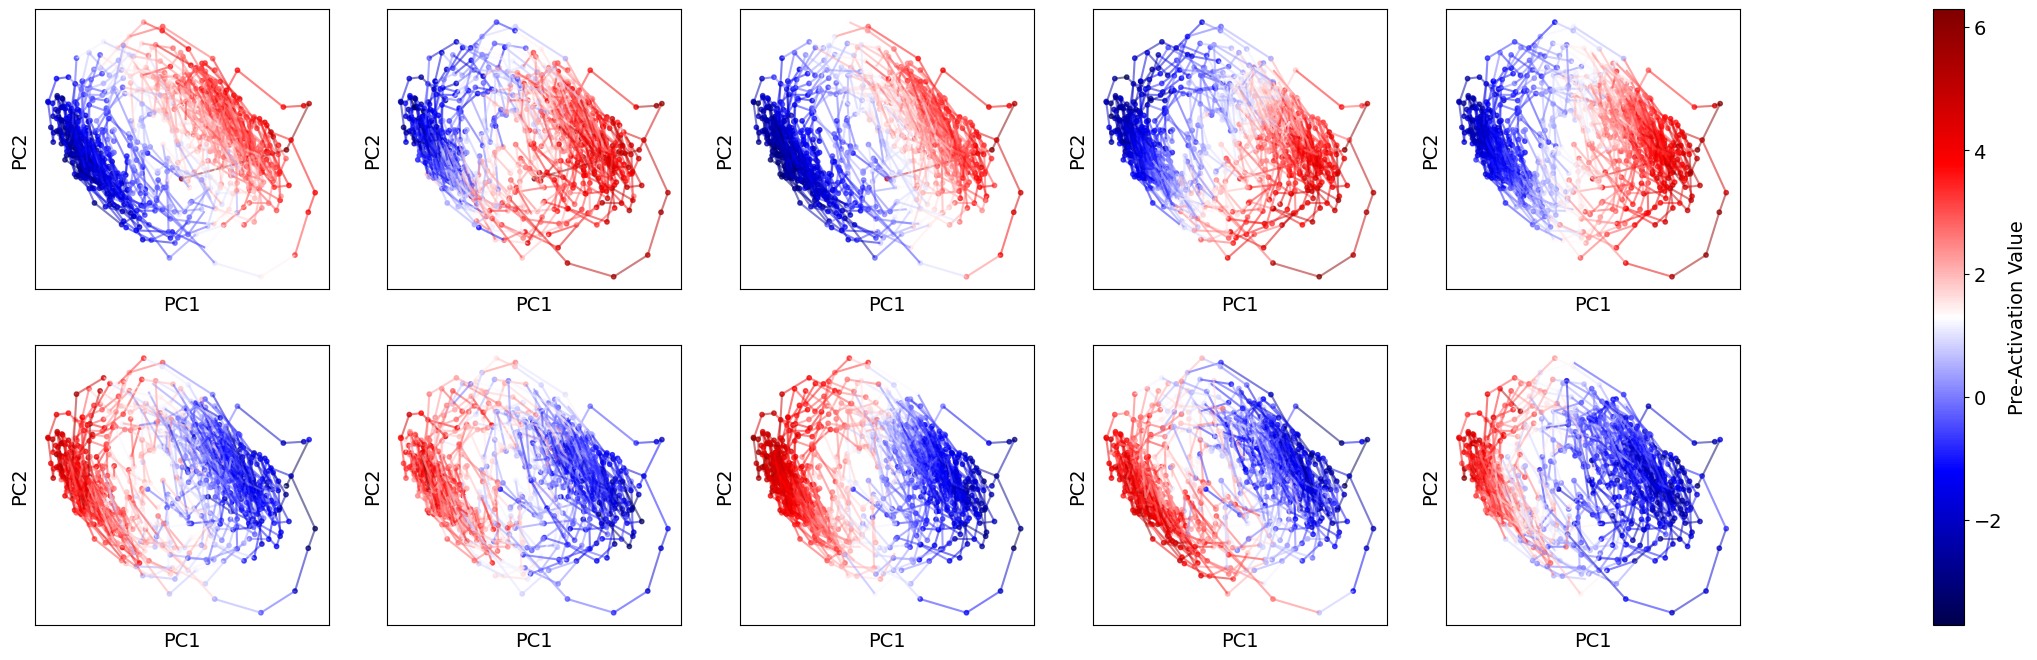

In [231]:
neuron_activities("TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth", specified_neurons=[10, 38, 55, 56, 99, 31, 75, 79, 91, 73])

In [ ]:
neuron_activities("Experiments/20250729_171645/pisellino4/models/4HMM_3Outputs_linear_30kData_0.001lr_5.5Loss.pth")

## Cyclic

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from sklearn.decomposition import PCA
from scripts.rnn import RNN

def plot_2d_trajectory(pca_hiddens, rnn_outputs, num_points=500, pc_dims=(0, 1)):
    colors_dict = {0: 'red', 1: 'blue', 2: 'green'}
    
    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(min(num_points, len(pca_hiddens)-1)):
        color = colors_dict[rnn_outputs[i]]
        start = pca_hiddens[i, pc_dims]
        end = pca_hiddens[i + 1, pc_dims]
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        
        ax.arrow(start[0], start[1], dx, dy, color=color,
                head_width=0.4, head_length=0.4, length_includes_head=True)
        
    ax.set_title("PCA Projection of RNN Hidden States (2D)", fontsize=16, fontweight="bold", pad=20)
    ax.set_xlabel(f"PC{pc_dims[0]+1}", fontsize=12)
    ax.set_ylabel(f"PC{pc_dims[1]+1}", fontsize=12)
    ax.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return fig, ax

In [361]:
def plot_trajectory(sequences, sequence_outputs, title="", pc_dims=(0, 1), num_trajectories=None):
    colors = {0: 'red', 1: 'blue', 2: 'green'}
    fig, ax = plt.subplots(figsize=(7, 5))
    
    if num_trajectories is None:
         num_trajectories = len(sequences)
    else:
         num_trajectories = min(num_trajectories, len(sequences))
    
    seq_lengths = [len(seq) for seq in sequences]
    sorted_indices = np.argsort(seq_lengths)[::-1]
    selected_indices = sorted_indices[:num_trajectories]
    
    for idx, seq_idx in enumerate(selected_indices):
         hiddens = sequences[seq_idx]
         outputs = sequence_outputs[seq_idx]
         alpha = max(0.8 - (idx * 0.1), 0.3)
         
         for i in range(len(hiddens) - 1):
              start = hiddens[i, pc_dims]
              end = hiddens[i + 1, pc_dims]
              ax.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], 
                         color=colors[outputs[i]], head_width=0.3, head_length=0.3, 
                         length_includes_head=True, alpha=alpha, linewidth=0.8)
    
    ax.set_title(f"{title}", fontsize=16, fontweight="bold")
    ax.set_xlabel(f"PC{pc_dims[0]+1}")
    ax.set_ylabel(f"PC{pc_dims[1]+1}")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from sklearn.decomposition import PCA
from scripts.rnn import RNN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size, hidden_size, output_size = 100, 150, 3
rnn = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
rnn.load_state_dict(torch.load("Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth", map_location=device))
rnn.eval()

ih = rnn.rnn.weight_ih_l0.data
hh = rnn.rnn.weight_hh_l0.data
fc = rnn.fc.weight.data

h = torch.normal(0, 1, size=(hidden_size,), device=device)
hidden_states, outputs = [], []

with torch.no_grad():
   for t in range(100000):
       x = torch.normal(0, 1, size=(input_size,), device=device)
       h = torch.relu(h @ hh.T + x @ ih.T)
       logits = h @ fc.T
       probs = F.softmax(logits, dim=0)
       output = torch.argmax(probs).cpu().numpy()
       
       hidden_states.append(h.cpu().numpy())
       outputs.append(output)

hidden_states = np.array(hidden_states)
outputs = np.array(outputs)

pca = PCA(n_components=4)
hidden_states_pca = pca.fit_transform(hidden_states)

def process_mask(outputs, hidden_states_pca, mask, min_length=200):
   filtered_hiddens = hidden_states_pca[mask]
   filtered_outputs = outputs[mask]
   
   pca_3d = PCA(n_components=3)
   hiddens_3d = pca_3d.fit_transform(filtered_hiddens)
   
   diff = np.diff(np.concatenate(([False], mask, [False])).astype(int))
   starts = np.where(diff == 1)[0]
   ends = np.where(diff == -1)[0]
   long_seqs = [(s, e) for s, e in zip(starts, ends) if (e - s) > min_length]
   
   if not long_seqs:
       return [], []
   
   sequences = []
   sequence_outputs = []
   filtered_indices = np.where(mask)[0]
   
   for seq_start, seq_end in long_seqs:
       start_idx = np.where(filtered_indices == seq_start)[0][0]
       end_idx = np.where(filtered_indices == seq_end - 1)[0][0] + 1
       sequences.append(hiddens_3d[start_idx:end_idx])
       sequence_outputs.append(filtered_outputs[start_idx:end_idx])
   
   return sequences, sequence_outputs

masks = {
   '01': (outputs == 0) | (outputs == 1),
   '12': (outputs == 1) | (outputs == 2), 
   '02': (outputs == 0) | (outputs == 2)
}

results = {}
for name, mask in masks.items():
   sequences, sequence_outputs = process_mask(outputs, hidden_states_pca, mask, min_length=200)
   results[name] = (sequences, sequence_outputs)

sequences_01, outputs_01 = results['01']
sequences_12, outputs_12 = results['12'] 
sequences_02, outputs_02 = results['02']

/tmp/ipykernel_419852/1405820029.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn.load_state_dict(torch.load("Experiments/20250615_232918/HMMThreeTriangularFully/mod

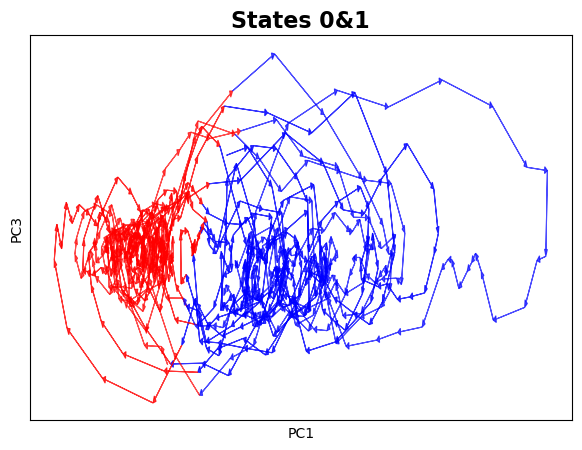

In [362]:
plot_trajectory(sequences_01, outputs_01, title="States 0&1", pc_dims=(0, 2), num_trajectories=2)
plt.show()

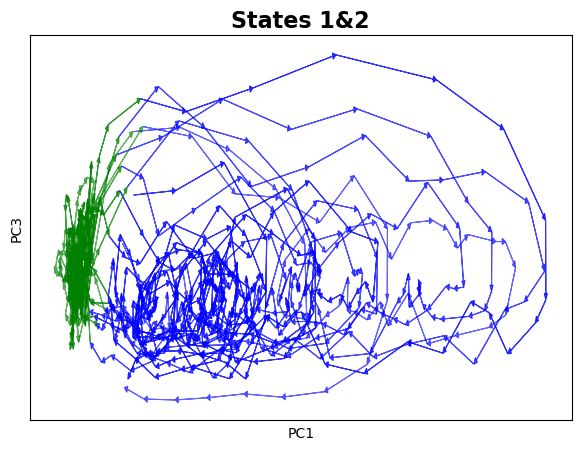

In [363]:
plot_trajectory(sequences_12, outputs_12, title="States 1&2", pc_dims=(0, 2), num_trajectories=3)
plt.show()

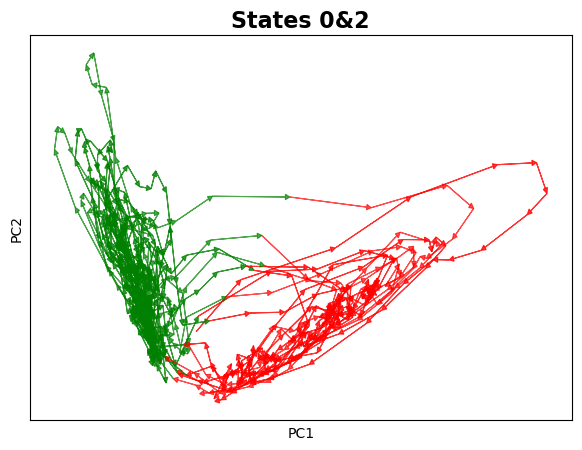

In [364]:
plot_trajectory(sequences_02, outputs_02, title="States 0&2", pc_dims=(0, 1), num_trajectories=2)
plt.show()

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from sklearn.decomposition import PCA
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
from scripts.rnn import RNN

def state_space(model_path, subset_states=['01', '12', '02'], timesteps=100000, neuron_index=0, input_size=100, hidden_size=150, output_size=3, device=None, show_arrows=False, arrow_density=20, colormap='seismic', 
                min_sequence_length=200, figsize=(15, 5), pc_components=[0, 1]):
    
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    rnn = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
    rnn.load_state_dict(torch.load(model_path, map_location=device))
    rnn.eval()
    ih = rnn.rnn.weight_ih_l0.data
    hh = rnn.rnn.weight_hh_l0.data
    fc = rnn.fc.weight.data
    
    h = torch.normal(0, 1, size=(hidden_size,), device=device)
    hidden_states = []
    outputs = []
    neuron_activities = []
    
    with torch.no_grad():
        for t in range(timesteps):
            x = torch.normal(0, 1, size=(input_size,), device=device)
            pre_act = h @ hh.T + x @ ih.T
            h = torch.relu(pre_act)
            logits = h @ fc.T
            probs = F.softmax(logits, dim=0)
            output = torch.argmax(probs).cpu().numpy()
            hidden_states.append(h.cpu().numpy())
            outputs.append(output)
            neuron_activities.append(pre_act[neuron_index].cpu().item())
    
    hidden_states = np.array(hidden_states)
    outputs = np.array(outputs)
    neuron_activities = np.array(neuron_activities)
    
    pca_initial = PCA(n_components=min(10, hidden_size)) 
    hidden_states_pca = pca_initial.fit_transform(hidden_states)
    
    def process_mask(outputs, hidden_states_pca, neuron_activities, mask, min_length=200):
        """Process sequences based on output mask"""
        filtered_hiddens = hidden_states_pca[mask]
        filtered_outputs = outputs[mask]
        filtered_activities = neuron_activities[mask]
        pca_filtered = PCA(n_components=4)
        hiddens_pca = pca_filtered.fit_transform(filtered_hiddens)
        diff = np.diff(np.concatenate(([False], mask, [False])).astype(int))
        starts, ends = np.where(diff == 1)[0], np.where(diff == -1)[0]
        long_seqs = [(s, e) for s, e in zip(starts, ends) if (e - s) > min_length]
        
        sequences = []
        sequence_outputs = []
        sequence_activities = []
        filtered_indices = np.where(mask)[0]
        
        for seq_start, seq_end in long_seqs:
            start_idx = np.where(filtered_indices == seq_start)[0][0]
            end_idx = np.where(filtered_indices == seq_end - 1)[0][0] + 1
            sequences.append(hiddens_pca[start_idx:end_idx])
            sequence_outputs.append(filtered_outputs[start_idx:end_idx])
            sequence_activities.append(filtered_activities[start_idx:end_idx])
        
        return sequences, sequence_outputs, sequence_activities, pca_filtered
    
    # Define masks for different output combinations
    masks = {'01': (outputs == 0) | (outputs == 1), '12': (outputs == 1) | (outputs == 2), '02': (outputs == 0) | (outputs == 2)}
    results = {}
    for name in subset_states:
        sequences, seq_outputs, seq_activities, pca_filtered = process_mask(outputs, hidden_states_pca, neuron_activities, masks[name], min_sequence_length)
        results[name] = {'sequences': sequences, 'outputs': seq_outputs, 'activities': seq_activities, 'pca': pca_filtered}
    
    # Create visualization
    n_subsets = len(subset_states)
    fig, axes = plt.subplots(1, n_subsets, figsize=figsize)
    if n_subsets == 1:
        axes = [axes]
    
    for i, subset_name in enumerate(subset_states):
        ax = axes[i]
        sequences = results[subset_name]['sequences']
        activities_list = results[subset_name]['activities']
        pca_filtered = results[subset_name]['pca']
        pc_x, pc_y = pc_components
        
        # Plot each sequence
        for seq_idx, (sequence, activities) in enumerate(zip(sequences, activities_list)):
            sequence_2d = sequence[:, [pc_x, pc_y]]
            points = sequence_2d.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            vmax = np.max(np.abs(activities))
            vmin = -vmax
            norm = Normalize(vmin=vmin, vmax=vmax)
            lc = LineCollection(segments, cmap=colormap, norm=norm, alpha=0.7, linewidths=2)
            lc.set_array(activities[:-1])
            line = ax.add_collection(lc)
            
            # Add directional arrows
            if show_arrows and arrow_density > 0 and len(sequence_2d) > arrow_density:
                arrow_spacing = max(1, len(sequence_2d) // arrow_density)
                for k in range(arrow_spacing, len(sequence_2d) - arrow_spacing, arrow_spacing):
                    dx = sequence_2d[k+1, 0] - sequence_2d[k, 0]
                    dy = sequence_2d[k+1, 1] - sequence_2d[k, 1]
                    ax.annotate('', 
                               xy=(sequence_2d[k, 0] + dx*0.5, sequence_2d[k, 1] + dy*0.5),
                               xytext=(sequence_2d[k, 0] - dx*0.5, sequence_2d[k, 1] - dy*0.5),
                               arrowprops=dict(arrowstyle='->', color='black', lw=1.5, alpha=0.7),
                               zorder=4)
        
        # Set labels and title
        pc_x_var = pca_filtered.explained_variance_ratio_[pc_x] if pc_x < len(pca_filtered.explained_variance_ratio_) else 0
        pc_y_var = pca_filtered.explained_variance_ratio_[pc_y] if pc_y < len(pca_filtered.explained_variance_ratio_) else 0
        
        ax.set_xlabel(f'PC{pc_x+1} (explained variance: {pc_x_var:.3f})', fontsize=12)
        ax.set_ylabel(f'PC{pc_y+1} (explained variance: {pc_y_var:.3f})', fontsize=12)
        ax.set_title(f'States {subset_name} - (Neuron {neuron_index})', fontsize=12, fontweight='bold', pad=20)

        all_x = np.concatenate([seq[:, pc_x] for seq in sequences if len(seq) > 0])
        all_y = np.concatenate([seq[:, pc_y] for seq in sequences if len(seq) > 0])
        
        x_padding = (all_x.max() - all_x.min()) * 0.1
        y_padding = (all_y.max() - all_y.min()) * 0.1
        ax.set_xlim(all_x.min() - x_padding, all_x.max() + x_padding)
        ax.set_ylim(all_y.min() - y_padding, all_y.max() + y_padding)

        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)
    
    plt.tight_layout()
    plt.show()

    return {'hidden_states': hidden_states, 'outputs': outputs, 'neuron_activities': neuron_activities, 'initial_pca': pca_initial, 'results': results, 'masks': masks}

In [ ]:
results = state_space(model_path="Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth",
    subset_states=['01', '12', '02'], neuron_index=33, timesteps=40000, min_sequence_length=200, pc_components=[0, 2], figsize=(15, 5))

In [ ]:
neuron_activities("Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth", specified_neurons=list(np.arange(150)))

In [ ]:
neuron_activities("TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth", specified_neurons=list(np.arange(150)))

In [300]:
def weight_matrices(W_r):
    """Plot weight matrices for kick neurons and integrating populations."""
    # Create figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    
    # Define neuron indices for kick groups
    #vec = np.array([109, 33, 119, 2, 58, 110]) # 2 states new seed
    vec = np.array([82, 44, 66, 47, 83, 74]) # 0-2 2-0

    
    # Plot 1: Kick Neurons ⇄ Kick Neurons
    axs[0].imshow(W_r[vec,:][:, vec], cmap='bwr', aspect='auto')
    axs[0].set_xticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], fontsize=14)
    axs[0].set_yticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], rotation=90, fontsize=14)
    axs[0].set_title("$W_{hh}$ weights: Kick Neurons ⇄ Kick Neurons", fontsize=13)
    
    # Calculate top-k integrating neurons
    topk = 70
    g1 = W_r[vec[:3],:].mean(axis=0)
    g2 = W_r[vec[3:],:].mean(axis=0)

    sortmap = np.argsort(g1*g2)

    g1 = g1[sortmap][:topk]
    g2 = g2[sortmap][:topk]
    sortmap2 = np.argsort(g1)
    final_map = sortmap[sortmap2[sortmap2<topk]]

    
    # Plot 2: Kick Neurons ⇄ Integrating Populations
    s1 = axs[1].imshow(W_r[vec, :][:, final_map], cmap='bwr', aspect='auto')
    axs[1].set_xticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], fontsize=14)
    axs[1].set_yticks(ticks=[1, 4], labels=["Kick group 1", "Kick group 2"], rotation=90, fontsize=14)
    axs[1].set_title("$W_{hh}$ weights: Kick Neurons ⇄ Integrating Populations", fontsize=13)
    
    # Plot 3: Integrating Populations ⇄ Integrating Populations
    axs[2].imshow(W_r[final_map, :][:, final_map], cmap='bwr', aspect='auto')
    axs[2].set_xticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], fontsize=14)
    axs[2].set_yticks(ticks=[int(topk * 0.25), int(topk * 0.75)], 
                     labels=["Integrating\npopulation 1", "Integrating\npopulation 2"], rotation=90, fontsize=14)
    axs[2].set_title("$W_{hh}$ weights: Integrating Pop. ⇄ Integrating Pop.", fontsize=13)
    
    # Add horizontal colorbar below all plots
    cbar = fig.colorbar(s1, ax=axs, orientation='horizontal', fraction=0.15, pad=0.05)
    cbar.set_label("Weight value")
    plt.show()

In [ ]:
model_path = "Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth"
weights = load_weights(model_path)
weight_matrices(weights[0])

In [10]:
def gen_trans_mat(states, target_prob):
        transition_matrix = np.zeros((states, states))
        q = target_prob ** (1/(states-1))
        transition_matrix[0, 0] = 1 - q
        transition_matrix[0, 1] = q
        transition_matrix[states-1, states-1] = 1 - q
        transition_matrix[states-1, states-2] = q
        for i in range(1, states-1):
            transition_matrix[i, i] = 1 - 2*q
            transition_matrix[i, i-1] = q
            transition_matrix[i, i+1] = q 
        return transition_matrix

def gen_emission_prob(states, outputs):
    emission_probabilities = np.zeros((states, outputs))
    for i in range(states):
        alpha = i / (states - 1) if states > 1 else 0
        p1 = 0.99 * (1 - alpha)
        p2 = 0.01
        p3 = 0.99 * alpha
        if outputs == 3:
            emission_probabilities[i, :] = [p1, p2, p3]
        else:
            emission_probabilities[i, :] = np.linspace(p1, p3, outputs)
    return emission_probabilities

In [ ]:
import numpy as np
from sequence_generator import generate_hmm_sequences, generate_rnn_sequences, fit_hmm_fixed_states
from itertools import permutations
import matplotlib.pyplot as plt

def best_permutation(P, Q):
    n = P.shape[0]
    best_dist = float('inf')
    best_perm = None
    
    for perm in permutations(range(n)):
        perm = list(perm)
        # Q_perm = Q[perm,:][:,perm] #np.ix_(perm, perm)]
        Q_perm = Q[:,perm][perm,:] #np.ix_(perm, perm)]
        dist = np.abs(P-Q_perm).mean() 
        #dist = np.linalg.norm(P - Q_perm, ord='fro')**2
        if dist < best_dist:
            best_dist = dist
            best_perm = perm
    
    return best_perm, best_dist

def gen_trans_mat(states, target_prob):
        transition_matrix = np.zeros((states, states))
        q = target_prob ** (1/(states-1))
        transition_matrix[0, 0] = 1 - q
        transition_matrix[0, 1] = q
        transition_matrix[states-1, states-1] = 1 - q
        transition_matrix[states-1, states-2] = q
        for i in range(1, states-1):
            transition_matrix[i, i] = 1 - 2*q
            transition_matrix[i, i-1] = q
            transition_matrix[i, i+1] = q 
        return transition_matrix

def gen_emission_prob(states, outputs):
    emission_probabilities = np.zeros((states, outputs))
    for i in range(states):
        alpha = i / (states - 1) if states > 1 else 0
        p1 = 0.99 * (1 - alpha)
        p2 = 0.01
        p3 = 0.99 * alpha
        if outputs == 3:
            emission_probabilities[i, :] = [p1, p2, p3]
        else:
            emission_probabilities[i, :] = np.linspace(p1, p3, outputs)
    return emission_probabilities


models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"]

data = {
        'error_avg_tr_rnn':[],
        'error_avg_tr_hmm':[],
        'error_avg_em_rnn':[],
        'error_avg_em_hmm':[],
}

timesteps = 1000
num_states = 5
num_outputs = 3
rndtot = 20
for nstates in range(2, num_states+1):
    tr, em = gen_trans_mat(nstates, 0.05), gen_emission_prob(nstates, 3)
    best_tr_hmm = None
    avg_tr_hmm = 0
    avg_em_hmm = 0
    best_em_hmm = None
    score_min_hmm = 1e20
    score_hmm = 1e20
    best_tr_rnn = None
    best_em_rnn = None
    avg_tr_rnn = 0
    avg_em_rnn = 0
    score_min_rnn = 1e20
    score_rnn = 1e20
    
    for rnd in range(rndtot):
        
        print(f"{(rndtot*(nstates-2) + rnd)/(rndtot*(num_states-1))*100:.2f}%", end="\r")
        rnd = None

        hmm_seq = generate_hmm_sequences(tr, em, timesteps, nstates, num_outputs)
        tr_hmm, em_hmm, _ = fit_hmm_fixed_states(hmm_seq.copy(), nstates, random_state=rnd)
        #score_hmm = -score_hmm
        perm, _ = best_permutation(tr, tr_hmm)
        #perm = np.argmax(tr_hmm, axis=1)
        tr_hmm = tr_hmm[:, perm][perm, :] #np.ix_(perm, perm)]
        em_hmm = em_hmm[perm, :]

        avg_tr_hmm += np.abs(tr_hmm-tr).mean()
        avg_em_hmm += np.abs(em_hmm-em).mean()

        rnn_seq = generate_rnn_sequences(models[nstates-2], timesteps, 100, 150, 3)
        tr_rnn, em_rnn, _ = fit_hmm_fixed_states(rnn_seq.copy(), nstates, random_state=rnd)
        #score_rnn = -score_rnn
        perm, _ = best_permutation(tr, tr_rnn)
        # perm = np.argmax(tr_rnn, axis=1)
        tr_rnn = tr_rnn[:, perm][perm, :]  #np.ix_(perm, perm)]
        em_rnn = em_rnn[perm, :]

        avg_tr_rnn += np.abs(tr_rnn-tr).mean()
        avg_em_rnn += np.abs(em_rnn-em).mean()
        
    avg_tr_rnn /= rndtot
    avg_em_rnn /= rndtot
    avg_tr_hmm /= rndtot
    avg_em_hmm /= rndtot


    data['error_avg_tr_rnn'].append(avg_tr_rnn)
    data['error_avg_tr_hmm'].append(avg_tr_hmm)
    data['error_avg_em_rnn'].append(avg_em_rnn)
    data['error_avg_em_hmm'].append(avg_em_hmm)


plt.plot(data['error_avg_tr_rnn'], label='RNN Avg')
plt.plot(data['error_avg_tr_hmm'], label='HMM Avg')
plt.xticks(range(len(data['error_avg_tr_rnn'])), range(2, num_states+1))
plt.legend()

In [ ]:
import numpy as np
from sequence_generator import generate_hmm_sequences, generate_rnn_sequences, fit_hmm_fixed_states
import matplotlib.pyplot as plt
from itertools import permutations

def best_permutation(P, Q):
    n = P.shape[0]
    best_dist = float('inf')
    best_perm = None
    
    for perm in permutations(range(n)):
        perm = list(perm)
        # Q_perm = Q[perm,:][:,perm] #np.ix_(perm, perm)]
        Q_perm = Q[:,perm][perm,:] #np.ix_(perm, perm)]
        dist = np.abs(P-Q_perm).mean() 
        #dist = np.linalg.norm(P - Q_perm, ord='fro')**2
        if dist < best_dist:
            best_dist = dist
            best_perm = perm
    
    return best_perm, best_dist

def gen_trans_mat(states, target_prob):
        transition_matrix = np.zeros((states, states))
        q = target_prob ** (1/(states-1))
        transition_matrix[0, 0] = 1 - q
        transition_matrix[0, 1] = q
        transition_matrix[states-1, states-1] = 1 - q
        transition_matrix[states-1, states-2] = q
        for i in range(1, states-1):
            transition_matrix[i, i] = 1 - 2*q
            transition_matrix[i, i-1] = q
            transition_matrix[i, i+1] = q 
        return transition_matrix

def gen_emission_prob(states, outputs):
    emission_probabilities = np.zeros((states, outputs))
    for i in range(states):
        alpha = i / (states - 1) if states > 1 else 0
        p1 = 0.99 * (1 - alpha)
        p2 = 0.01
        p3 = 0.99 * alpha
        if outputs == 3:
            emission_probabilities[i, :] = [p1, p2, p3]
        else:
            emission_probabilities[i, :] = np.linspace(p1, p3, outputs)
    return emission_probabilities


    models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
                "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
                "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
                "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
                ]

data = {
        'error_avg_tr_rnn':[],
        'error_avg_tr_hmm':[],
        'error_avg_em_rnn':[],
        'error_avg_em_hmm':[],
        'error_best_tr_rnn':[],
        'error_best_tr_hmm':[],
        'error_best_em_rnn':[],
        'error_best_em_hmm':[],
}

timesteps = 1000
num_states = 5
num_outputs = 3
rndtot = 100
for nstates in range(2, num_states+1):
    tr, em = gen_trans_mat(nstates, 0.05), gen_emission_prob(nstates, 3)
    best_tr_hmm = None
    avg_tr_hmm = 0
    avg_em_hmm = 0
    best_em_hmm = None
    score_min_hmm = 1e20
    best_tr_rnn = None
    best_em_rnn = None
    avg_tr_rnn = 0
    avg_em_rnn = 0
    score_min_rnn = 1e20
    
    for rnd in range(rndtot):
        
        print(f"{(rndtot*(nstates-2) + rnd)/(rndtot*(num_states-1))*100:.2f}%", end="\r")
        rnd = None

        hmm_seq = generate_hmm_sequences(tr, em, timesteps, nstates, num_outputs)
        tr_hmm, em_hmm, _ = fit_hmm_fixed_states(hmm_seq.copy(), nstates, random_state=rnd)
        #score_hmm = -score_hmm
        perm, _ = best_permutation(tr, tr_hmm)
        #perm = np.argmax(tr_hmm, axis=1)
        tr_hmm = tr_hmm[:, perm][perm, :] #np.ix_(perm, perm)]
        em_hmm = em_hmm[perm, :]

        avg_tr_hmm += tr_hmm
        avg_em_hmm += em_hmm

        #if best_tr_hmm is not None:
            #score_hmm = np.abs(tr-best_tr_hmm).mean()

        #if best_tr_hmm is None or score_hmm < score_min_hmm:
            #best_tr_hmm = tr_hmm
            #best_em_hmm = em_hmm
            #score_min_hmm = score_hmm

        rnn_seq = generate_rnn_sequences(models[nstates-2], timesteps, 100, 150, 3)
        tr_rnn, em_rnn, _ = fit_hmm_fixed_states(rnn_seq.copy(), nstates, random_state=rnd)
        #score_rnn = -score_rnn
        perm, _ = best_permutation(tr, tr_rnn)
        # perm = np.argmax(tr_rnn, axis=1)
        tr_rnn = tr_rnn[:, perm][perm, :]  #np.ix_(perm, perm)]
        em_rnn = em_rnn[perm, :]

        avg_tr_rnn += tr_rnn
        avg_em_rnn += em_rnn
        
        #if best_tr_rnn is not None:
            #score_rnn = np.abs(tr-best_tr_rnn).mean()

        #if best_tr_rnn is None or score_rnn < score_min_rnn:
            #best_tr_rnn = tr_rnn
            #best_em_rnn = em_rnn
            #score_min_rnn = score_rnn

    avg_tr_rnn /= rndtot
    avg_em_rnn /= rndtot
    avg_tr_hmm /= rndtot
    avg_em_hmm /= rndtot


    data['error_avg_tr_rnn'].append(np.abs(tr-avg_tr_rnn).mean())
    data['error_avg_tr_hmm'].append(np.abs(tr-avg_tr_hmm).mean())
    data['error_avg_em_rnn'].append(np.abs(em-avg_em_rnn).mean())
    data['error_avg_em_hmm'].append(np.abs(em-avg_em_hmm).mean())
    #data['error_best_tr_rnn'].append(np.abs(tr-best_tr_rnn).mean())
    #data['error_best_tr_hmm'].append(np.abs(tr-best_tr_hmm).mean())
    #data['error_best_em_rnn'].append(np.abs(em-best_em_rnn).mean())
    #data['error_best_em_hmm'].append(np.abs(em-best_em_hmm).mean())

    # print("Abs error RNN Avg Transition matrix: ", np.abs(tr-avg_tr_rnn).mean())
    # print("Abs error HMM Avg Transition matrix: ", np.abs(tr-avg_tr_hmm).mean())
    # print("Abs error RNN Avg Emission matrix: ", np.abs(em-avg_em_rnn).mean())
    # print("Abs error HMM Avg Emission matrix: ", np.abs(em-avg_em_hmm).mean())
    # print()
    # print("Abs error RNN Best Transition matrix: ", np.abs(tr-best_tr_rnn).mean())
    # print("Abs error HMM Best Transition matrix: ", np.abs(tr-best_tr_hmm).mean())
    # print("Abs error RNN Best Emission matrix: ", np.abs(em-best_em_rnn).mean())
    # print("Abs error HMM Best Emission matrix: ", np.abs(em-best_em_hmm).mean())


plt.plot(data['error_avg_tr_rnn'], label='RNN Avg Transition')
plt.plot(data['error_avg_tr_hmm'], label='HMM Avg Transition')
plt.xticks(range(len(data['error_avg_tr_rnn'])), range(2, num_states+1))
plt.legend()

In [ ]:
import numpy as np
from sequence_generator import wrapper
models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
            ]
results = 

In [ ]:
import numpy as np
from sequence_generator import wrapper
argmin_hmm = []
argmin_rnn = []
rndtot = 10
states = 
tr, em = gen_trans_mat(states, 0.05), gen_emission_prob(states, 3)
for rnd in range(rndtot):
    print(f"{rnd/rndtot*100:.2f}%", end="\r")
    aic_hmm, bic_hmm, log_likelihoods, aic_rnn, bic_rnn, log_likelihoods_rnn, tr_hmm, em_hmm, tr_rnn, em_rnn = wrapper(
                                                                                                                        model_path="TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth", 
                                                                                                                        timesteps=10000, 
                                                                                                                        input_size=100, 
                                                                                                                        hidden_size=150, 
                                                                                                                        output_size=3, 
                                                                                                                        transition_matrix=tr, 
                                                                                                                        emission_matrix=em, 
                                                                                                                        num_states=states, 
                                                                                                                        num_outputs=3, 
                                                                                                                        random_state=rnd
                                                                                                                        )
    bic_hmm = np.array(bic_hmm)
    bic_rnn = np.array(bic_rnn)
    argmin_hmm.append(np.argmin(bic_hmm)+2)
    argmin_rnn.append(np.argmin(bic_rnn)+2)

In [ ]:
argmin_hmm

In [ ]:
argmin_rnn

In [ ]:
import numpy as np
from sequence_generator import generate_hmm_sequences, generate_rnn_sequences, fit_hmm_fixed_states

def gen_trans_mat(states, target_prob):
        transition_matrix = np.zeros((states, states))
        q = target_prob ** (1/(states-1))
        transition_matrix[0, 0] = 1 - q
        transition_matrix[0, 1] = q
        transition_matrix[states-1, states-1] = 1 - q
        transition_matrix[states-1, states-2] = q
        for i in range(1, states-1):
            transition_matrix[i, i] = 1 - 2*q
            transition_matrix[i, i-1] = q
            transition_matrix[i, i+1] = q 
        return transition_matrix

def gen_emission_prob(states, outputs):
    emission_probabilities = np.zeros((states, outputs))
    for i in range(states):
        alpha = i / (states - 1) if states > 1 else 0
        p1 = 0.99 * (1 - alpha)
        p2 = 0.01
        p3 = 0.99 * alpha
        if outputs == 3:
            emission_probabilities[i, :] = [p1, p2, p3]
        else:
            emission_probabilities[i, :] = np.linspace(p1, p3, outputs)
    return emission_probabilities

best_tr_hmm = None
best_em_hmm = None
score_min_hmm = 1e20
best_tr_rnn = None
best_em_rnn = None
score_min_rnn = 1e20

models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
            ]

timesteps = 10000
num_states = 2
model = 2
model_hmm = 4
num_outputs = 3
tr, em = gen_trans_mat(model_hmm, 0.05), gen_emission_prob(model_hmm, 3)
rndtot = np.random.randint(0, 1000, size=100)  # 10 random numbers
for rnd in rndtot:
    #print(f"{rnd/rndtot*100:.2f}%", end="\r")

    hmm_seq = generate_hmm_sequences(tr, em, timesteps, model_hmm, num_outputs)
    tr_hmm, em_hmm, score_hmm = fit_hmm_fixed_states(hmm_seq.copy(), num_states, random_state=rnd)
    #score_hmm = -score_hmm

    if best_tr_hmm is None or score_hmm < score_min_hmm:
        best_tr_hmm = tr_hmm
        best_em_hmm = em_hmm
        score_min_hmm = score_hmm

    rnn_seq = generate_rnn_sequences(models[model], timesteps, 100, 150, 3)
    tr_rnn, em_rnn, score_rnn = fit_hmm_fixed_states(rnn_seq.copy(), num_states, random_state=rnd)
    #score_rnn = -score_rnn

    if best_tr_rnn is None or score_rnn < score_min_rnn:
        best_tr_rnn = tr_rnn
        best_em_rnn = em_rnn
        score_min_rnn = score_rnn

print(score_min_hmm)

In [47]:
tr = gen_trans_mat(num_states, 0.05)
em = gen_emission_prob(num_states, 3)
tr

array([[0.95, 0.05],
       [0.05, 0.95]])

In [200]:
print(np.mean([0.636, 0.6989, 0.6847]))
print(np.mean([0.6358, 0.675, 0.625]))
print(np.mean([0.805, 0.9637, 0.89]))
print(np.mean([0.806, 0.984, 0.96]))

0.6732
0.6452666666666667
0.8862333333333333
0.9166666666666666


In [39]:
best_tr_hmm

array([[0.68325984, 0.31674016],
       [0.39145377, 0.60854623]])

In [40]:
best_tr_rnn

array([[0.63260015, 0.36739985],
       [0.42724401, 0.57275599]])

In [41]:
best_em_hmm

array([[0.8458161 , 0.00470826, 0.14947563],
       [0.02512085, 0.01653805, 0.9583411 ]])

In [42]:
best_em_rnn

array([[8.02574014e-01, 6.11578382e-04, 1.96814407e-01],
       [1.85090669e-02, 1.66807969e-03, 9.79822853e-01]])

In [ ]:
array([[0.16268312, 0.00610206, 0.83121482],
       [0.88882919, 0.01318059, 0.09799022]])

In [4]:
import numpy as np
from sequence_generator import generate_hmm_sequences, generate_rnn_sequences, fit_hmm_fixed_states
def wrapper(model_path, timesteps=1000, input_size=100, hidden_size=150, output_size=3, transition_matrix=None, emission_matrix=None, num_states=None, num_outputs=None, random_state=42):
    hmm_seq = generate_hmm_sequences(transition_matrix, emission_matrix, timesteps, num_states, num_outputs)
    rnn_seq = generate_rnn_sequences(model_path, timesteps, input_size, hidden_size, output_size)
    tr_hmm, em_hmm, log_likelihoods_hmm = fit_hmm_fixed_states(hmm_seq, num_states, random_state=random_state)
    tr_rnn, em_rnn, log_likelihoods_rnn = fit_hmm_fixed_states(rnn_seq, num_states, random_state=random_state)
    return log_likelihoods_hmm, log_likelihoods_rnn, tr_hmm, em_hmm, tr_rnn, em_rnn

result = np.zeros((3, 2))
states = 2
models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
            ]
for i in range(3):
    tr, em = gen_trans_mat(states, 0.05), gen_emission_prob(states, 3)
    log_likelihoods_hmm, log_likelihoods_rnn, tr_hmm, em_hmm, tr_rnn, em_rnn = wrapper(models[0], 10000, 100, 150, 3, tr, em, states, 3, 0)
    result[i, 0] = log_likelihoods_hmm
    result[i, 1] = log_likelihoods_rnn

/home/elia/Documents/rnnrep/sequence_generator.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn.load_state_dict(torch.load(model_path, map_location=device))
/home/el

In [5]:
result

array([[-7387.20637452, -6925.38707026],
       [-7377.48347642, -6921.20266598],
       [-7388.896247  , -6910.73992923]])

In [ ]:
import numpy as np
from sequence_generator import wrapper

def hmm_fitting(states, random_state=0):
    models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
            ]
    tr, em = gen_trans_mat(states, 0.05), gen_emission_prob(states, 3)
    return wrapper(model_path=models[states-2], timesteps=10000, input_size=100, hidden_size=150, output_size=3, transition_matrix=tr, 
                   emission_matrix=em, num_states=states, num_outputs=3, random_state=random_state)

all_results = {}
for states in range(2, 6):
    state_results = []
    for seed in range(3):
        result = hmm_fitting(states, random_state=seed)
        state_results.append(result)
    
    all_results[states] = state_results

In [4]:
all_results

{2: [([14884.243201170282,
    14624.980199254027,
    14638.001877029552,
    14838.255067231388,
    14745.027736295366,
    14806.606199304108,
    14911.23002722703,
    14967.9604436073,
    15110.370270430736],
   [np.float64(14934.715583774116),
    np.float64(14725.924964461694),
    np.float64(14803.839705585004),
    np.float64(15083.406639878578),
    np.float64(15083.913733778247),
    np.float64(15253.647302366631),
    np.float64(15480.846916613147),
    np.float64(15674.573800060967),
    np.float64(15968.400774695901)],
   [-7435.121600585141,
    -7298.4900996270135,
    -7296.000938514776,
    -7385.127533615694,
    -7325.513868147683,
    -7341.303099652054,
    -7376.615013613515,
    -7385.98022180365,
    -7436.185135215368],
   [13845.634020586916,
    13559.796715725593,
    13574.198463235323,
    13790.039032666711,
    13685.968055146184,
    13746.967347340213,
    13854.378465436774,
    13910.587903037094,
    14065.185534448843],
   [np.float64(13881.685

In [5]:
def print_matrices(all_results, seed_index=0):
    """
    Print transition and emission matrices for a specific seed/run
    
    Args:
        all_results: Dictionary containing raw results (not averaged)
        seed_index: Which seed/run to display (0-9)
    """
    
    if seed_index < 0 or seed_index >= 10:
        print("Error: seed_index must be between 0 and 9")
        return
    
    print(f"\n" + "="*120)
    print(f"TRANSITION AND EMISSION MATRICES - SEED {seed_index}")
    print("="*120)
    
    for states in range(2, 6):
        if states not in all_results:
            continue
            
        # Get the specific result for this seed
        result = all_results[states][seed_index]
        
        # Extract matrices: (aic_hmm, bic_hmm, ll_hmm, aic_rnn, bic_rnn, ll_rnn, tr_hmm, em_hmm, tr_rnn, em_rnn)
        tr_hmm = result[6]  # Transition matrix HMM
        em_hmm = result[7]  # Emission matrix HMM  
        tr_rnn = result[8]  # Transition matrix RNN
        em_rnn = result[9]  # Emission matrix RNN
        
        print(f"\n{states} STATES:")
        print("-" * 80)
        
        # HMM Matrices
        print("HMM TRANSITION MATRIX:")
        for i, row in enumerate(tr_hmm):
            row_str = " ".join([f"{val:.3f}" for val in row])
            print(f"  State {i}: [{row_str}]")
        
        print("\nHMM EMISSION MATRIX:")
        for i, row in enumerate(em_hmm):
            row_str = " ".join([f"{val:.3f}" for val in row])
            print(f"  State {i}: [{row_str}]")
        
        print("\nRNN TRANSITION MATRIX:")
        for i, row in enumerate(tr_rnn):
            row_str = " ".join([f"{val:.3f}" for val in row])
            print(f"  State {i}: [{row_str}]")
        
        print("\nRNN EMISSION MATRIX:")
        for i, row in enumerate(em_rnn):
            row_str = " ".join([f"{val:.3f}" for val in row])
            print(f"  State {i}: [{row_str}]")
        
        print()
    
    print("="*120)

In [4]:
def print_detailed_matrices(all_results, states=2):
    """
    Print detailed transition and emission matrices for a specific number of states
    """
    print(f"\n" + "="*80)
    print(f"DETAILED MATRICES FOR {states} STATES")
    print("="*80)
    
    if states not in all_results:
        print(f"No data for {states} states")
        return
    
    means = all_results[states]['mean']
    stds = all_results[states]['std']
    tr_hmm, em_hmm, tr_rnn, em_rnn = means[6], means[7], means[8], means[9]
    tr_hmm_std, em_hmm_std, tr_rnn_std, em_rnn_std = stds[6], stds[7], stds[8], stds[9]
    
    print("\nTRANSITION MATRICES:")
    print("-" * 40)
    print("HMM Transition (mean ± std):")
    for i in range(len(tr_hmm)):
        row_str = " ".join([f"{tr_hmm[i,j]:.3f}±{tr_hmm_std[i,j]:.3f}" for j in range(len(tr_hmm[i]))])
        print(f"  {row_str}")
    
    print("\nRNN Transition (mean ± std):")
    for i in range(len(tr_rnn)):
        row_str = " ".join([f"{tr_rnn[i,j]:.3f}±{tr_rnn_std[i,j]:.3f}" for j in range(len(tr_rnn[i]))])
        print(f"  {row_str}")
    
    print("\nEMISSION MATRICES:")
    print("-" * 40)
    print("HMM Emission (mean ± std):")
    for i in range(len(em_hmm)):
        row_str = " ".join([f"{em_hmm[i,j]:.3f}±{em_hmm_std[i,j]:.3f}" for j in range(len(em_hmm[i]))])
        print(f"  {row_str}")
    
    print("\nRNN Emission (mean ± std):")
    for i in range(len(em_rnn)):
        row_str = " ".join([f"{em_rnn[i,j]:.3f}±{em_rnn_std[i,j]:.3f}" for j in range(len(em_rnn[i]))])
        print(f"  {row_str}")

In [6]:
print_matrices(all_results, 0)


TRANSITION AND EMISSION MATRICES - SEED 0

2 STATES:
--------------------------------------------------------------------------------
HMM TRANSITION MATRIX:
  State 0: [0.500 0.500]
  State 1: [0.500 0.500]

HMM EMISSION MATRIX:
  State 0: [0.522 0.013 0.465]
  State 1: [0.506 0.008 0.487]

RNN TRANSITION MATRIX:
  State 0: [0.500 0.500]
  State 1: [0.500 0.500]

RNN EMISSION MATRIX:
  State 0: [0.532 0.000 0.468]
  State 1: [0.513 0.000 0.487]


3 STATES:
--------------------------------------------------------------------------------
HMM TRANSITION MATRIX:
  State 0: [0.336 0.335 0.329]
  State 1: [0.335 0.335 0.330]
  State 2: [0.329 0.330 0.341]

HMM EMISSION MATRIX:
  State 0: [0.558 0.011 0.431]
  State 1: [0.542 0.006 0.451]
  State 2: [0.388 0.012 0.600]

RNN TRANSITION MATRIX:
  State 0: [0.338 0.337 0.325]
  State 1: [0.337 0.336 0.328]
  State 2: [0.325 0.328 0.347]

RNN EMISSION MATRIX:
  State 0: [0.556 0.000 0.444]
  State 1: [0.537 0.000 0.463]
  State 2: [0.385 0.000 0

In [6]:
print_detailed_matrices(all_results, states=2)
print_detailed_matrices(all_results, states=3)
print_detailed_matrices(all_results, states=4)
print_detailed_matrices(all_results, states=5)


DETAILED MATRICES FOR 2 STATES

TRANSITION MATRICES:
----------------------------------------
HMM Transition (mean ± std):
  0.609±0.113 0.391±0.113
  0.384±0.117 0.616±0.117

RNN Transition (mean ± std):
  0.619±0.125 0.381±0.125
  0.374±0.129 0.626±0.129

EMISSION MATRICES:
----------------------------------------
HMM Emission (mean ± std):
  0.469±0.255 0.012±0.007 0.519±0.255
  0.529±0.244 0.009±0.006 0.462±0.245

RNN Emission (mean ± std):
  0.481±0.265 0.000±0.000 0.519±0.265
  0.538±0.245 0.000±0.000 0.462±0.245

DETAILED MATRICES FOR 3 STATES

TRANSITION MATRICES:
----------------------------------------
HMM Transition (mean ± std):
  0.372±0.050 0.317±0.021 0.311±0.052
  0.310±0.020 0.364±0.046 0.326±0.034
  0.302±0.061 0.322±0.031 0.376±0.048

RNN Transition (mean ± std):
  0.406±0.091 0.304±0.037 0.290±0.095
  0.298±0.034 0.386±0.081 0.316±0.055
  0.285±0.100 0.312±0.054 0.403±0.077

EMISSION MATRICES:
----------------------------------------
HMM Emission (mean ± std):
  0.

## Cross-Matching

In [43]:
from hmmlearn.hmm import CategoricalHMM
import torch
import torch.nn.functional as F

def gen_seq(num_seq, seq_len, num_states, tr, em):
    """Generate sequences from the HMM."""
    model = CategoricalHMM(n_components=num_states)
    model.startprob_ = np.full(num_states, 1/num_states)
    model.transmat_ = tr
    model.emissionprob_ = em
    
    sampled_sequences = np.zeros((num_seq, seq_len))
    sampled_states = np.zeros((num_seq, seq_len))
    
    for i in range(num_seq):
        observations, hidden_states = model.sample(seq_len)
        sampled_sequences[i] = observations.reshape((seq_len))
        sampled_states[i] = hidden_states
        
    one_hot_sequences = F.one_hot(torch.tensor(sampled_sequences).long(), num_classes=3)
    
    return one_hot_sequences, sampled_states

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scripts.sinkhorn import SinkhornSolver

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def match(seq1, seq2):
    sinkhorn = SinkhornSolver(epsilon=0.1, iterations=1000)
    seq1_flat = seq1.reshape(seq1.shape[0], -1)
    seq1_flat = torch.tensor(seq1_flat).float().to(device)
    seq2_flat = seq2.reshape(seq2.shape[0], -1)
    seq2_flat = torch.tensor(seq2_flat).float().to(device)
    tp = sinkhorn(seq1_flat, seq2_flat)
    matched_seq1 = seq1_flat[tp[1].argmax(0)].cpu().detach().numpy()
    matched_seq2 = seq2_flat.cpu().detach().numpy()
    
    return matched_seq1, matched_seq2

def euclidean_distances(seq1, seq2):
    seq1_matched, seq2_matched = match(seq1, seq2)
    distances = np.linalg.norm(seq1_matched - seq2_matched, axis=1)
    return distances

In [44]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist
import numpy as np
import torch
import matplotlib.pyplot as plt

def match(seq1, seq2):
    # Flatten the sequences
    seq1_flat = seq1.reshape(seq1.shape[0], -1)
    seq2_flat = seq2.reshape(seq2.shape[0], -1)
    
    # Convert to numpy if they're torch tensors
    if hasattr(seq1_flat, 'cpu'):
        seq1_flat = seq1_flat.cpu().detach().numpy()
    if hasattr(seq2_flat, 'cpu'):
        seq2_flat = seq2_flat.cpu().detach().numpy()
    
    # Compute pairwise distances (cost matrix)
    cost_matrix = cdist(seq1_flat, seq2_flat, metric='euclidean')
    print("Cost matrix shape:", cost_matrix.shape)
    
    # Solve the assignment problem
    row_indices, col_indices = linear_sum_assignment(cost_matrix)
    
    # Create matched sequences based on the assignment
    matched_seq1 = seq1_flat[row_indices]
    matched_seq2 = seq2_flat[col_indices]
    
    return matched_seq1, matched_seq2

def euclidean_distances(seq1, seq2):
    seq1_matched, seq2_matched = match(seq1, seq2)
    distances = np.linalg.norm(seq1_matched - seq2_matched, axis=1)
    return distances

def volatilities(seq):
    seq_max = np.argmax(seq, axis=2)
    diff = np.diff(seq_max, axis=1)
    changes = np.count_nonzero(diff, axis=1)
    return np.mean(changes), np.std(changes)

def transition_matrices(seq, seq_len):
    mat = np.zeros((3, 3))
    seq_max = np.argmax(seq, axis=2)
    for i in range(seq.shape[0]):
        for j in range(1, seq_len):
            mat[seq_max[i, j-1], seq_max[i, j]] += 1
    return mat/mat.sum(axis=1, keepdims=True)

In [78]:
from sequence_generator import generate_rnn_sequences
import numpy as np
import torch
models = ["TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
            ]

vol = np.zeros((4, 2))
trans = np.zeros((4, 3, 3))
for i in range(2, 6):
    #rnn_seq = torch.tensor(generate_rnn_sequences(models[i-2], 100000, 100, 150, 3).reshape(1000, 100, 3))
    tr, em = gen_trans_mat(i, 0.05), gen_emission_prob(i, 3)
    rnn_seq, _ = gen_seq(1000, 100, i, tr, em)
    vol[i-2, 0], vol[i-2, 1] = volatilities(rnn_seq)
    trans[i-2] = transition_matrices(rnn_seq, 100)

RNN
array([[ 6.243     ,  3.47224786],
       [26.317     ,  5.69651744],
       [32.391     ,  5.91659691],
       [33.773     ,  5.69942725]])

array([[[9.36686526e-01, 1.10020136e-03, 6.22132730e-02],
        [4.71698113e-01, 9.43396226e-03, 5.18867925e-01],
        [5.91865302e-02, 1.02521638e-03, 9.39788253e-01]],

       [[7.21448068e-01, 7.59332608e-04, 2.77792600e-01],
        [5.13513514e-01, 0.00000000e+00, 4.86486486e-01],
        [2.69447599e-01, 7.17145760e-04, 7.29835256e-01]],

       [[6.61802173e-01, 9.98715937e-04, 3.37199111e-01],
        [4.05405405e-01, 0.00000000e+00, 5.94594595e-01],
        [3.31915064e-01, 1.24433027e-03, 6.66840605e-01]],

       [[6.51306508e-01, 1.62940884e-03, 3.47064083e-01],
        [5.15151515e-01, 1.21212121e-02, 4.72727273e-01],
        [3.60070089e-01, 1.69037312e-03, 6.38239538e-01]]])

In [76]:
vol

array([[ 6.84      ,  2.83344314],
       [25.334     ,  5.31774802],
       [29.784     ,  5.76622441],
       [30.664     ,  5.5408577 ]])

In [79]:
trans

array([[[0.93808727, 0.01106912, 0.05084361],
        [0.49440299, 0.00839552, 0.49720149],
        [0.04973235, 0.01062519, 0.93964246]],

       [[0.74870064, 0.00991862, 0.24138074],
        [0.45508982, 0.01397206, 0.53093812],
        [0.23542903, 0.01034101, 0.75422996]],

       [[0.70752186, 0.00987078, 0.28260736],
        [0.49740933, 0.01139896, 0.49119171],
        [0.28040403, 0.00959272, 0.71000325]],

       [[0.70339907, 0.01026657, 0.28633436],
        [0.496875  , 0.01041667, 0.49270833],
        [0.30486498, 0.00914154, 0.68599349]]])

HMM

array([[ 6.766     ,  2.81447047],
       [25.464     ,  5.37165747],
       [29.791     ,  5.47844129],
       [30.887     ,  5.72959257]])

array([[[0.93976154, 0.00986664, 0.05037182],
        [0.48106448, 0.00818833, 0.51074719],
        [0.04813456, 0.00994367, 0.94192177]],

       [[0.75300766, 0.01028882, 0.23670353],
        [0.4729207 , 0.00580271, 0.5212766 ],
        [0.24127428, 0.01063961, 0.7480861 ]],

       [[0.70815859, 0.00964363, 0.28219778],
        [0.50561798, 0.0102145 , 0.48416752],
        [0.28601373, 0.01025441, 0.70373186]],

       [[0.69613955, 0.01051926, 0.29334119],
        [0.50945274, 0.00995025, 0.48059701],
        [0.2963981 , 0.00982524, 0.69377667]]])

In [16]:
from sequence_generator import generate_rnn_sequences
models = ["TrainedModels/Two/hidden_150/input_100/seed_0/models/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth",
            "TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth",
            "TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth",
            "TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth"
            ]

results = np.zeros((4,4))
for hmm_states in range(2, 6):
    for rnn_states in range(2, 6):
        print(f"Processing HMM states: {hmm_states}, RNN states: {rnn_states}")
        tr, em = gen_trans_mat(hmm_states, 0.05), gen_emission_prob(hmm_states, 3)
        hmm_seq, _ = gen_seq(1000, 50, hmm_states, tr, em)
        #tr2, em2 = gen_trans_mat(rnn_states, 0.05), gen_emission_prob(rnn_states, 3)
        #rnn_seq, _ = gen_seq(1000, 50, rnn_states, tr2, em2)
        rnn_seq = torch.tensor(generate_rnn_sequences(models[rnn_states-2], 50000, 100, 150, 3).reshape(1000, 50, 3))
        euc = euclidean_distances(hmm_seq, rnn_seq)
        results[hmm_states-2, rnn_states-2] = euc.mean()

Processing HMM states: 2, RNN states: 2


/tmp/ipykernel_385547/3298168730.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq1_flat = torch.tensor(seq1_flat).float().to(device)
/tmp/ipykernel_385547/3298168730.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq2_flat = torch.tensor(seq2_flat).float().to(device)


Processing HMM states: 2, RNN states: 3
Processing HMM states: 2, RNN states: 4
Processing HMM states: 2, RNN states: 5
Processing HMM states: 3, RNN states: 2
Processing HMM states: 3, RNN states: 3
Processing HMM states: 3, RNN states: 4
Processing HMM states: 3, RNN states: 5
Processing HMM states: 4, RNN states: 2
Processing HMM states: 4, RNN states: 3
Processing HMM states: 4, RNN states: 4
Processing HMM states: 4, RNN states: 5
Processing HMM states: 5, RNN states: 2
Processing HMM states: 5, RNN states: 3
Processing HMM states: 5, RNN states: 4
Processing HMM states: 5, RNN states: 5


In [17]:
results

array([[1.43608177, 4.17338419, 4.47401667, 4.57247448],
       [4.26636505, 4.63981676, 4.79839659, 4.86944246],
       [3.95205092, 4.70911407, 4.88350582, 4.9259758 ],
       [3.84553742, 4.75783777, 4.87287712, 4.9032073 ]])

## Additional Experiments for Reviewer 2 (Fully-connected)

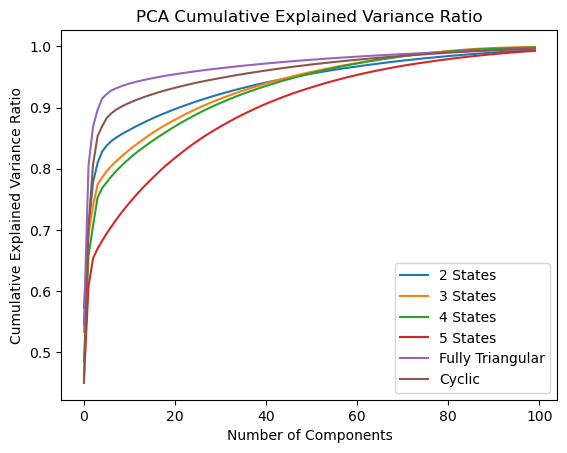

In [14]:
import numpy as np
import torch
from scripts.rnn import RNN

def generate_rnn_sequences(model_path, timesteps=1000, input_size=100, hidden_size=150, output_size=3, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    rnn = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)
    rnn.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    rnn.eval()
    
    ih = rnn.rnn.weight_ih_l0.data
    hh = rnn.rnn.weight_hh_l0.data
    fc = rnn.fc.weight.data
    
    h = torch.normal(0, 1, size=(hidden_size,), device=device)
    hidden_states = np.zeros((timesteps, hidden_size))
    
    with torch.no_grad():
        for t in range(timesteps):
            x = torch.normal(0, 1, size=(input_size,), device=device)
            pre_act = h @ hh.T + x @ ih.T
            h = torch.relu(pre_act)
            hidden_states[t] = h.cpu().numpy()
    return hidden_states

original_2 = generate_rnn_sequences("TrainedModels/ReverseEngineeredModel/2HMM_3Outputs_linear_30kData_0.001lr_10.0Loss.pth", 30000)
original_3 = generate_rnn_sequences("TrainedModels/Three/hidden_150/input_100/seed_0/models/3HMM_3Outputs_linear_30kData_0.001lr_4.1Loss.pth", 30000)
original_4 = generate_rnn_sequences("TrainedModels/Four/hidden_150/input_100/seed_0/models/4HMM_3Outputs_linear_30kData_0.001lr_4.6Loss.pth", 30000)
original_5 = generate_rnn_sequences("TrainedModels/Five/hidden_150/input_100/seed_0/models/5HMM_3Outputs_linear_30kData_0.001lr_7.8Loss.pth", 30000)
fully_seq = generate_rnn_sequences("Experiments/20250615_232918/HMMThreeTriangularFully/models/3HMM_3Outputs_triangular_30kData_0.001lr_1.9Loss.pth", 30000)
cyclic_seq = generate_rnn_sequences("Experiments/20250729_171645/pisellino4/models/4HMM_3Outputs_linear_30kData_0.001lr_5.5Loss.pth", 30000)

#perform 2 pcas and estimate dimensionality
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_2 = PCA(n_components=100)
pca_3 = PCA(n_components=100)
pca_4 = PCA(n_components=100)
pca_5 = PCA(n_components=100)
pca_fully = PCA(n_components=100)
pca_cyclic = PCA(n_components=100)
pca_2.fit(original_2)
pca_3.fit(original_3)
pca_4.fit(original_4)
pca_5.fit(original_5)
pca_fully.fit(fully_seq)
pca_cyclic.fit(cyclic_seq)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), label='2 States')
plt.plot(np.cumsum(pca_3.explained_variance_ratio_), label='3 States')
plt.plot(np.cumsum(pca_4.explained_variance_ratio_), label='4 States')
plt.plot(np.cumsum(pca_5.explained_variance_ratio_), label='5 States')
plt.plot(np.cumsum(pca_fully.explained_variance_ratio_), label='Fully Triangular')
plt.plot(np.cumsum(pca_cyclic.explained_variance_ratio_), label='Cyclic')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.title('PCA Cumulative Explained Variance Ratio')
plt.show()